# 1. EXTRACT – Build or prepare a dataset

## Layoff data

### Setup and Initial Data Load

In [8]:
import pandas as pd
import numpy as np


df_layoffs = pd.read_csv('../data/layoffs/layoffs_data.csv') 

print(f"Data shape after initial load: {df_layoffs.shape}")
df_layoffs.head()

Data shape after initial load: (3642, 12)


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


### Data Type Conversion

In [9]:
df_layoffs['Date'] = pd.to_datetime(df_layoffs['Date'], errors='coerce')
    
df_layoffs.dropna(subset=['Date'], inplace=True)
    
df_layoffs.sort_values(by='Date', inplace=True)
    
df_layoffs['Company'] = df_layoffs['Company'].astype(str).str.strip().str.lower()
    
print("Date column converted, data sorted, and Company names standardized.")
print(f"Data shape after date cleaning: {df_layoffs.shape}")


df_layoffs['year'] = df_layoffs['Date'].dt.year
df_layoffs['quarter'] = df_layoffs['Date'].dt.quarter
df_layoffs['year_quarter'] = df_layoffs['year'].astype(str) + '-Q' + df_layoffs['quarter'].astype(str)

print(f"\nQuarter columns added:")
print(f"Unique quarters: {df_layoffs['year_quarter'].nunique()}")
print(f"Quarter range: {df_layoffs['year_quarter'].min()} to {df_layoffs['year_quarter'].max()}")
print(f"\nSample data with quarters:")
display(df_layoffs[['Company', 'Date', 'year', 'quarter', 'year_quarter', 'Laid_Off_Count']].head(10))

Date column converted, data sorted, and Company names standardized.
Data shape after date cleaning: (3642, 12)

Quarter columns added:
Unique quarters: 18
Quarter range: 2020-Q1 to 2024-Q2

Sample data with quarters:


,Company,Date,year,quarter,year_quarter,Laid_Off_Count
3641,easypost,2020-03-11,2020,1,2020-Q1,75.0
3640,tamara mellon,2020-03-12,2020,1,2020-Q1,20.0
3638,hopskipdrive,2020-03-13,2020,1,2020-Q1,8.0
3639,panda squad,2020-03-13,2020,1,2020-Q1,6.0
3637,service,2020-03-16,2020,1,2020-Q1,NaN
3636,help.com,2020-03-16,2020,1,2020-Q1,16.0
3635,inspirato,2020-03-16,2020,1,2020-Q1,130.0
3634,flytedesk,2020-03-18,2020,1,2020-Q1,4.0
3628,ejento,2020-03-19,2020,1,2020-Q1,84.0
3629,remote year,2020-03-19,2020,1,2020-Q1,50.0


### Handling Missing Layoff Metrics

In [10]:
df_layoffs['Inferred_Total_Employees'] = np.where(
    (df_layoffs['Percentage'].notna()) & (df_layoffs['Percentage'] > 0),
    df_layoffs['Laid_Off_Count'] / df_layoffs['Percentage'],
    np.nan
)

df_layoffs['Laid_Off_Count'] = df_layoffs['Laid_Off_Count'].fillna(0)

df_layoffs['Funds_Raised'] = df_layoffs['Funds_Raised'].fillna(0)

print("Layoff counts and funds raised NaNs handled.")
print("\nMissing values after initial metric handling:")
print(df_layoffs[['Laid_Off_Count', 'Funds_Raised']].isnull().sum())
df_layoffs.sample(5)

Layoff counts and funds raised NaNs handled.

Missing values after initial metric handling:
Laid_Off_Count    0
Funds_Raised      0
dtype: int64


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,year,quarter,year_quarter,Inferred_Total_Employees
192,popcore,Berlin,Consumer,0.0,2024-02-13,https://www.pocketgamer.biz/news/83416/popcore...,0.0,Acquired,2024-02-28 18:49:40,Germany,NaN,Unknown,2024,1,2024-Q1,NaN
728,vesttoo,Tel Aviv,Finance,150.0,2023-08-01,https://www.calcalistech.com/ctechnews/article...,110.0,Series C,2023-08-03 03:43:19,Israel,0.75,Unknown,2023,3,2023-Q3,200.000000
3205,revolut,London,Finance,60.0,2020-05-11,https://www.fnlondon.com/articles/digital-bank...,837.0,Series D,2020-05-20 03:27:35,United Kingdom,0.03,Unknown,2020,2,2020-Q2,2000.000000
165,vice media,New York City,Media,0.0,2024-02-22,https://www.nytimes.com/2024/02/22/business/vi...,1600.0,Unknown,2024-02-24 01:55:05,United States,NaN,Unknown,2024,1,2024-Q1,NaN
3102,godaddy,Austin,Marketing,451.0,2020-06-24,https://domainnamewire.com/2020/06/24/godaddy-...,0.0,Post-IPO,2020-06-25 05:21:17,United States,0.06,Unknown,2020,2,2020-Q2,7516.666667


### Aggregate to company-quarter level

In [21]:
# Aggregate layoffs by company-quarter
layoff_quarterly = df_layoffs.groupby(['Company', 'year', 'quarter', 'year_quarter']).agg(
    Layoff_Event_Count=('Date', 'size'),
    Total_Laid_Off_Sum=('Laid_Off_Count', 'sum'),
    Avg_Layoff_Percentage=('Percentage', lambda x: x.mean(skipna=True)),
    Latest_Industry=('Industry', 'last'),
    Latest_Country=('Country', 'last'),
    Latest_Stage=('Stage', 'last'),
    Latest_Funds_Raised=('Funds_Raised', 'max')
).reset_index()

# Create quarter start date (first day of each quarter)
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
layoff_quarterly['Date'] = pd.to_datetime(
    layoff_quarterly['year'].astype(str) + '-' + 
    layoff_quarterly['quarter'].map(quarter_to_month).astype(str) + '-01'
)

layoff_quarterly['Layoff_Event_Binary'] = 1

print(f"Quarterly aggregated shape: {layoff_quarterly.shape}")
print(f"Companies with layoffs: {layoff_quarterly['Company'].nunique()}")
print(f"Quarters with layoffs: {layoff_quarterly['year_quarter'].nunique()}")
print(f"\nSample quarterly aggregated data:")
display(layoff_quarterly.head(5))

Quarterly aggregated shape: (3537, 13)
Companies with layoffs: 2586
Quarters with layoffs: 18

Sample quarterly aggregated data:


,Company,year,quarter,year_quarter,Layoff_Event_Count,Total_Laid_Off_Sum,Avg_Layoff_Percentage,Latest_Industry,Latest_Country,Latest_Stage,Latest_Funds_Raised,Date,Layoff_Event_Binary
0,#paid,2023,1,2023-Q1,1,19.0,0.17,Marketing,Canada,Series B,21.0,2023-01-01,1
1,&open,2022,4,2022-Q4,1,9.0,0.09,Marketing,Ireland,Series A,35.0,2022-10-01,1
2,100 thieves,2022,3,2022-Q3,1,12.0,NaN,Consumer,United States,Series C,120.0,2022-07-01,1
3,100 thieves,2023,1,2023-Q1,1,0.0,NaN,Retail,United States,Series C,120.0,2023-01-01,1
4,10x genomics,2022,3,2022-Q3,1,100.0,0.08,Healthcare,United States,Post-IPO,242.0,2022-07-01,1


### Create Full Company-Quarter Panel

In [25]:
all_companies = layoff_quarterly['Company'].unique()
min_date = layoff_quarterly['Date'].min()
max_date = layoff_quarterly['Date'].max()

all_quarters = pd.date_range(start=min_date, end=max_date, freq='QS')

from itertools import product
full_index = pd.DataFrame(
    list(product(all_companies, all_quarters)),
    columns=['Company', 'Date']
)

full_index['year'] = full_index['Date'].dt.year
full_index['quarter'] = full_index['Date'].dt.quarter
full_index['year_quarter'] = (
    full_index['year'].astype(str) + '-Q' + 
    full_index['quarter'].astype(str)
)

df_panel = full_index.merge(
    layoff_quarterly, 
    on=['Company', 'Date', 'year', 'quarter', 'year_quarter'], 
    how='left'
)

df_panel['Layoff_Event_Binary'] = df_panel['Layoff_Event_Binary'].fillna(0)
df_panel['Total_Laid_Off_Sum'] = df_panel['Total_Laid_Off_Sum'].fillna(0)
df_panel['Layoff_Event_Count'] = df_panel['Layoff_Event_Count'].fillna(0)

df_panel = df_panel.sort_values(['Company', 'Date']).reset_index(drop=True)

print(f"Full quarterly panel shape: {df_panel.shape}")
print(f"Companies: {df_panel['Company'].nunique()}")
print(f"Quarters: {df_panel['year_quarter'].nunique()}")
print(f"Expected rows: {len(all_companies)} × {len(all_quarters)} = {len(all_companies) * len(all_quarters)}")
print(f"Layoff events: {df_panel['Layoff_Event_Binary'].sum():.0f}")
print(f"\nSample company timeline:")
display(df_panel[df_panel['Company'] ==  'amazon'][['Company', 'Date', 'year_quarter', 'Layoff_Event_Binary', 'Total_Laid_Off_Sum']].head(5))
print(f"\nMissing values:")
print(df_panel.isnull().sum())

Full quarterly panel shape: (46548, 13)
Companies: 2586
Quarters: 18
Expected rows: 2586 × 18 = 46548
Layoff events: 3537

Sample company timeline:


,Company,Date,year_quarter,Layoff_Event_Binary,Total_Laid_Off_Sum
1512,amazon,2020-01-01,2020-Q1,0.0,0.0
1513,amazon,2020-04-01,2020-Q2,0.0,0.0
1514,amazon,2020-07-01,2020-Q3,0.0,0.0
1515,amazon,2020-10-01,2020-Q4,0.0,0.0
1516,amazon,2021-01-01,2021-Q1,0.0,0.0



Missing values:
Company                      0
Date                         0
year                         0
quarter                      0
year_quarter                 0
Layoff_Event_Count           0
Total_Laid_Off_Sum           0
Avg_Layoff_Percentage    44240
Latest_Industry          43011
Latest_Country           43011
Latest_Stage             43011
Latest_Funds_Raised      43011
Layoff_Event_Binary          0
dtype: int64


### Forward Fill Company Attributes

In [26]:
# Forward fill company attributes within each company
df_panel['Latest_Industry'] = df_panel.groupby('Company')['Latest_Industry'].ffill()
df_panel['Latest_Country'] = df_panel.groupby('Company')['Latest_Country'].ffill()
df_panel['Latest_Stage'] = df_panel.groupby('Company')['Latest_Stage'].ffill()
df_panel['Latest_Funds_Raised'] = df_panel.groupby('Company')['Latest_Funds_Raised'].ffill()

# Backward fill for companies where first month has layoff
df_panel['Latest_Industry'] = df_panel.groupby('Company')['Latest_Industry'].bfill()
df_panel['Latest_Country'] = df_panel.groupby('Company')['Latest_Country'].bfill()
df_panel['Latest_Stage'] = df_panel.groupby('Company')['Latest_Stage'].bfill()

# Fill remaining NaNs with "Unknown"
df_panel['Latest_Industry'] = df_panel['Latest_Industry'].fillna('Unknown')
df_panel['Latest_Country'] = df_panel['Latest_Country'].fillna('Unknown')
df_panel['Latest_Stage'] = df_panel['Latest_Stage'].fillna('Unknown')
df_panel['Latest_Funds_Raised'] = df_panel['Latest_Funds_Raised'].fillna(0)

print("Company attributes filled")
print(f"\nMissing values:")
print(df_panel.isnull().sum())
print(f"\nSample with attributes:")
df_panel[df_panel['Company'] == 'apple'][['Company', 'Date', 'Latest_Industry', 'Latest_Stage', 'Layoff_Event_Binary']].head(5)

Company attributes filled

Missing values:
Company                      0
Date                         0
year                         0
quarter                      0
year_quarter                 0
Layoff_Event_Count           0
Total_Laid_Off_Sum           0
Avg_Layoff_Percentage    44240
Latest_Industry              0
Latest_Country               0
Latest_Stage                 0
Latest_Funds_Raised          0
Layoff_Event_Binary          0
dtype: int64

Sample with attributes:


,Company,Date,Latest_Industry,Latest_Stage,Layoff_Event_Binary
2142,apple,2020-01-01,Retail,Post-IPO,0.0
2143,apple,2020-04-01,Retail,Post-IPO,0.0
2144,apple,2020-07-01,Retail,Post-IPO,0.0
2145,apple,2020-10-01,Retail,Post-IPO,0.0
2146,apple,2021-01-01,Retail,Post-IPO,0.0


### Basic EDA - Layoff Data

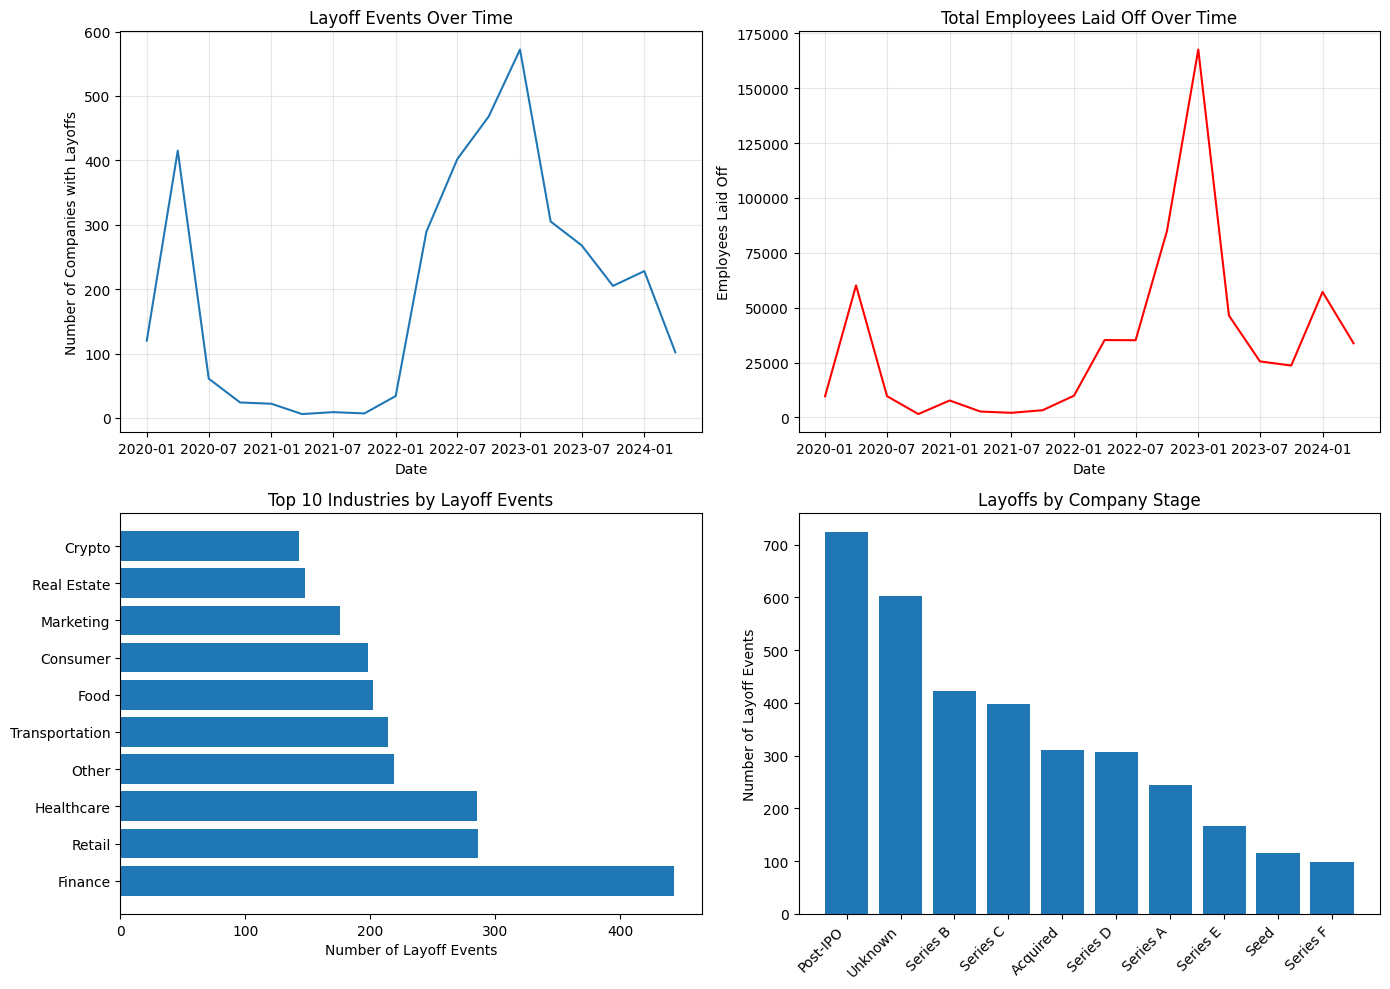

Total unique companies: 2586
Date range: 2020-01-01 00:00:00 to 2024-04-01 00:00:00
Total months: 18
Class imbalance: 0.0    0.924014
1.0    0.075986
Name: Layoff_Event_Binary, dtype: float64


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Layoff events over time
monthly_counts = df_panel.groupby('Date')['Layoff_Event_Binary'].sum()
axes[0, 0].plot(monthly_counts.index, monthly_counts.values)
axes[0, 0].set_title('Layoff Events Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Companies with Layoffs')
axes[0, 0].grid(True, alpha=0.3)

# 2. Total employees laid off over time
monthly_layoffs = df_panel.groupby('Date')['Total_Laid_Off_Sum'].sum()
axes[0, 1].plot(monthly_layoffs.index, monthly_layoffs.values, color='red')
axes[0, 1].set_title('Total Employees Laid Off Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Employees Laid Off')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top industries with layoffs
industry_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Industry'].value_counts().head(10)
axes[1, 0].barh(range(len(industry_counts)), industry_counts.values)
axes[1, 0].set_yticks(range(len(industry_counts)))
axes[1, 0].set_yticklabels(industry_counts.index)
axes[1, 0].set_title('Top 10 Industries by Layoff Events')
axes[1, 0].set_xlabel('Number of Layoff Events')

# 4. Company stage distribution
stage_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Stage'].value_counts().head(10)
axes[1, 1].bar(range(len(stage_counts)), stage_counts.values)
axes[1, 1].set_xticks(range(len(stage_counts)))
axes[1, 1].set_xticklabels(stage_counts.index, rotation=45, ha='right')
axes[1, 1].set_title('Layoffs by Company Stage')
axes[1, 1].set_ylabel('Number of Layoff Events')

plt.tight_layout()
plt.show()

print(f"Total unique companies: {df_panel['Company'].nunique()}")
print(f"Date range: {df_panel['Date'].min()} to {df_panel['Date'].max()}")
print(f"Total months: {df_panel['Date'].nunique()}")
print(f"Class imbalance: {df_panel['Layoff_Event_Binary'].value_counts(normalize=True)}")

### Analyze Company Coverage in Layoff Data

In [29]:
# Check which companies have the most layoff events
company_layoff_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1].groupby('Company').size().sort_values(ascending=False)

print("Companies with most layoff events:")
print(company_layoff_counts.head(20))
print(f"\nCompanies with 2+ layoff events: {(company_layoff_counts >= 2).sum()}")
print(f"Companies with 3+ layoff events: {(company_layoff_counts >= 3).sum()}")
print(f"Companies with only 1 layoff event: {(company_layoff_counts == 1).sum()}")

# Check public vs private split
stage_dist = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Stage'].value_counts()
print(f"\nLayoff events by stage:")
print(stage_dist)

Companies with most layoff events:
Company
microsoft     7
loft          6
amazon        6
stitch fix    6
convoy        6
rivian        6
better.com    6
swiggy        5
new relic     5
peloton       5
bytedance     5
expedia       5
salesforce    5
vroom         5
gopuff        5
intel         5
google        5
blend         5
unity         5
homie         4
dtype: int64

Companies with 2+ layoff events: 658
Companies with 3+ layoff events: 198
Companies with only 1 layoff event: 1928

Layoff events by stage:
Post-IPO          724
Unknown           603
Series B          423
Series C          397
Acquired          310
Series D          307
Series A          244
Series E          166
Seed              116
Series F           98
Private Equity     63
Series H           29
Subsidiary         21
Series G           21
Series J            8
Series I            7
Name: Latest_Stage, dtype: int64


### Save Cleaned Layoff Panel

In [30]:
df_panel.to_csv('../data/layoffs/layoffs_panel_cleaned.csv', index=False)

print("Saved layoff panel data")
print(f"\nFinal shape: {df_panel.shape}")
print(f"Columns: {df_panel.columns.tolist()}")

Saved layoff panel data

Final shape: (46548, 13)
Columns: ['Company', 'Date', 'year', 'quarter', 'year_quarter', 'Layoff_Event_Count', 'Total_Laid_Off_Sum', 'Avg_Layoff_Percentage', 'Latest_Industry', 'Latest_Country', 'Latest_Stage', 'Latest_Funds_Raised', 'Layoff_Event_Binary']


## Ecomonic data from FRED API

### Collect Economic Data

In [32]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime, timedelta
import numpy as np

# Standard FRED codes
FRED_CODES_FOR_MODEL = {
    'UNRATE': 'unemployment_rate',        # Monthly
    'A191RL1Q225SBEA': 'gdp_growth_rate', # Quarterly (Annualized Real GDP)
    'DFF': 'fed_funds_rate',              # Daily
    'CPIAUCSL': 'cpi',                    # Monthly
    'UMCSENT': 'consumer_confidence',     # Monthly
    'SP500': 'sp500_index',               # Daily
    'ICSA': 'avg_jobless_claims',         # Weekly
}

def collect_and_process_economic_data(start_date_str='2018-01-01', end_date_str='2024-06-01'):
    """
    Collects economic indicators and converts to quarterly frequency.
    Starts from 2018 to provide buffer for lag features (lag4 = 1 year back).
    """
    print("Collecting and processing all economic data...")
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    
    try:
        # Fetch all data in one large pull 
        df_raw = pdr.get_data_fred(list(FRED_CODES_FOR_MODEL.keys()), start=start_date, end=end_date)
    except Exception as e:
        print(f"ERROR: Failed to fetch FRED data. {e}")
        return pd.DataFrame()
        
    # --- 1. First resample to monthly (intermediate step) ---
    
    idx_monthly = pd.date_range(start_date, end_date, freq='MS')
    df_monthly = pd.DataFrame(index=idx_monthly)
    
    # Monthly/Quarterly data - use last value
    for code in ['UNRATE', 'CPIAUCSL', 'UMCSENT', 'A191RL1Q225SBEA']:
        if code in df_raw.columns:
            df_monthly[FRED_CODES_FOR_MODEL[code]] = df_raw[code].resample('MS').last().ffill()
            
    # Daily/Weekly data - use average
    for code in ['DFF', 'ICSA']:
        if code in df_raw.columns:
            df_monthly[FRED_CODES_FOR_MODEL[code]] = df_raw[code].resample('MS').mean().ffill()

    # S&P 500 - use last value
    if 'SP500' in df_raw.columns:
        df_monthly[FRED_CODES_FOR_MODEL['SP500']] = df_raw['SP500'].resample('MS').last().ffill()
    
    # --- 2. Aggregate monthly data to quarterly ---
    
    # Create quarterly index
    idx_quarterly = pd.date_range(start_date, end_date, freq='QS')
    df_quarterly = pd.DataFrame(index=idx_quarterly)
    
    # For most indicators, use quarterly average
    for col in df_monthly.columns:
        if col in ['gdp_growth_rate']:
            # GDP is already quarterly - use last value in quarter
            df_quarterly[col] = df_monthly[col].resample('QS').last()
        else:
            # Average monthly values within each quarter
            df_quarterly[col] = df_monthly[col].resample('QS').mean()
    
    # --- 3. Calculate Derived Features on Quarterly Data ---
    
    # Inflation Rate (YoY Change) - compare to 4 quarters ago
    if 'cpi' in df_quarterly.columns:
        df_quarterly['inflation_rate_yoy'] = df_quarterly['cpi'].pct_change(periods=4) * 100
        
    # S&P 500 2-Quarter Change (instead of 6-month)
    if 'sp500_index' in df_quarterly.columns:
        df_quarterly['sp500_change_6mo'] = df_quarterly['sp500_index'].pct_change(periods=2) * 100
        
    # --- 4. Add year and quarter columns ---
    df_quarterly = df_quarterly.reset_index().rename(columns={'index': 'Date'})
    df_quarterly['year'] = df_quarterly['Date'].dt.year
    df_quarterly['quarter'] = df_quarterly['Date'].dt.quarter
    df_quarterly['year_quarter'] = (
        df_quarterly['year'].astype(str) + '-Q' + 
        df_quarterly['quarter'].astype(str)
    )
    
    print(f"\nProcessing complete. Quarterly shape: {df_quarterly.shape}")
    print(f"Quarters: {df_quarterly['year_quarter'].min()} to {df_quarterly['year_quarter'].max()}")
    return df_quarterly

# Run the collection
df_economic = collect_and_process_economic_data()
print("\nQuarterly Economic Data:")
display(df_economic.head(10))


Processing complete. Quarterly shape: (26, 13)
Quarters: 2018-Q1 to 2024-Q2

Quarterly Economic Data:


,Date,unemployment_rate,cpi,consumer_confidence,gdp_growth_rate,fed_funds_rate,avg_jobless_claims,sp500_index,inflation_rate_yoy,sp500_change_6mo,year,quarter,year_quarter
0,2018-01-01,4.033333,249.321667,98.933333,3.3,1.446048,2.273500e+05,2726.170000,NaN,NaN,2018,1,2018-Q1
1,2018-04-01,3.933333,250.679000,98.333333,2.1,1.737333,2.217833e+05,2690.563333,NaN,NaN,2018,2,2018-Q2
2,2018-07-01,3.766667,251.686333,98.066667,2.5,1.926502,2.077333e+05,2877.263333,NaN,5.542330,2018,3,2018-Q3
3,2018-10-01,3.833333,252.711000,98.133333,0.6,2.219867,2.209500e+05,2659.586667,NaN,-1.151308,2018,4,2018-Q4
4,2019-01-01,3.866667,253.385667,94.466667,2.5,2.401720,2.190167e+05,2774.330000,1.630023,-3.577474,2019,1,2019-Q1
5,2019-04-01,3.633333,255.247333,98.466667,3.4,2.397434,2.178167e+05,2879.883333,1.822384,8.283117,2019,2,2019-Q2
6,2019-07-01,3.600000,256.089333,93.800000,4.8,2.190570,2.096667e+05,2961.193333,1.749400,6.735440,2019,3,2019-Q3
7,2019-10-01,3.600000,257.888000,97.200000,2.8,1.644659,2.242167e+05,3136.440000,2.048585,8.908578,2019,4,2019-Q4
8,2020-01-01,3.833333,258.817667,96.633333,-5.2,1.262002,9.203167e+05,2921.443333,2.143768,-1.342364,2020,1,2020-Q1
9,2020-04-01,13.000000,256.292000,74.066667,-28.0,0.058889,2.775633e+06,3019.010000,0.409276,-3.744054,2020,2,2020-Q2


### Load and Prepare Economic Data

In [33]:
df_economic['Date'] = pd.to_datetime(df_economic['Date'])

print(f"Economic data shape: {df_economic.shape}")
print(f"Date range: {df_economic['Date'].min()} to {df_economic['Date'].max()}")
print(f"\nColumns: {df_economic.columns.tolist()}")
print(f"\nMissing values:")
print(df_economic.isnull().sum())
print(f"\nSample:")
df_economic.head()

Economic data shape: (26, 13)
Date range: 2018-01-01 00:00:00 to 2024-04-01 00:00:00

Columns: ['Date', 'unemployment_rate', 'cpi', 'consumer_confidence', 'gdp_growth_rate', 'fed_funds_rate', 'avg_jobless_claims', 'sp500_index', 'inflation_rate_yoy', 'sp500_change_6mo', 'year', 'quarter', 'year_quarter']

Missing values:
Date                   0
unemployment_rate      0
cpi                    0
consumer_confidence    0
gdp_growth_rate        0
fed_funds_rate         0
avg_jobless_claims     0
sp500_index            0
inflation_rate_yoy     4
sp500_change_6mo       2
year                   0
quarter                0
year_quarter           0
dtype: int64

Sample:


,Date,unemployment_rate,cpi,consumer_confidence,gdp_growth_rate,fed_funds_rate,avg_jobless_claims,sp500_index,inflation_rate_yoy,sp500_change_6mo,year,quarter,year_quarter
0,2018-01-01,4.033333,249.321667,98.933333,3.3,1.446048,227350.000000,2726.170000,NaN,NaN,2018,1,2018-Q1
1,2018-04-01,3.933333,250.679000,98.333333,2.1,1.737333,221783.333333,2690.563333,NaN,NaN,2018,2,2018-Q2
2,2018-07-01,3.766667,251.686333,98.066667,2.5,1.926502,207733.333333,2877.263333,NaN,5.542330,2018,3,2018-Q3
3,2018-10-01,3.833333,252.711000,98.133333,0.6,2.219867,220950.000000,2659.586667,NaN,-1.151308,2018,4,2018-Q4
4,2019-01-01,3.866667,253.385667,94.466667,2.5,2.401720,219016.666667,2774.330000,1.630023,-3.577474,2019,1,2019-Q1


### Merge Economic Data with 1-Quarter Lag

In [35]:
df_panel = pd.read_csv('../data/layoffs/layoffs_panel_cleaned.csv')
df_panel['Date'] = pd.to_datetime(df_panel['Date'])

df_panel['year'] = df_panel['Date'].dt.year
df_panel['quarter'] = df_panel['Date'].dt.quarter
df_panel['year_quarter'] = df_panel['year'].astype(str) + '-Q' + df_panel['quarter'].astype(str)

df_econ_lagged = df_economic.copy()
df_econ_lagged['Date'] = pd.to_datetime(df_econ_lagged['Date']) + pd.DateOffset(months=3)
df_econ_lagged['year'] = df_econ_lagged['Date'].dt.year
df_econ_lagged['quarter'] = df_econ_lagged['Date'].dt.quarter

economic_cols = [
    'unemployment_rate', 'gdp_growth_rate', 'fed_funds_rate', 
    'cpi', 'consumer_confidence', 'avg_jobless_claims', 
    'inflation_rate_yoy', 'sp500_change_6mo', 'sp500_index' 
]

for col in economic_cols:
    df_econ_lagged.rename(columns={col: f'{col}_lag1'}, inplace=True)

lagged_cols = [f'{col}_lag1' for col in economic_cols]

print(f"Panel date range: {df_panel['Date'].min()} to {df_panel['Date'].max()}")
print(f"Panel quarters: {df_panel['year_quarter'].min()} to {df_panel['year_quarter'].max()}")
print(f"Economic data date range (after lag): {df_econ_lagged['Date'].min()} to {df_econ_lagged['Date'].max()}")

df_merged = df_panel.merge(
    df_econ_lagged[['year', 'quarter'] + lagged_cols],
    on=['year', 'quarter'],
    how='left'
)

print(f"\nMissing values in economic indicators:")
print(df_merged[lagged_cols].isnull().sum())

df_merged = df_merged.sort_values(['Company', 'Date'])
df_merged[lagged_cols] = df_merged.groupby('Company')[lagged_cols].ffill()

print(f"\nMissing values after forward fill:")
print(df_merged[lagged_cols].isnull().sum())

print(f"\nMerged shape: {df_merged.shape}")

print(f"\nSample merged data:")
display(df_merged[df_merged['Company'] == 'amazon'][
    ['Company', 'Date', 'year_quarter', 'Layoff_Event_Binary', 'unemployment_rate_lag1', 'fed_funds_rate_lag1']
].head(10))

Panel date range: 2020-01-01 00:00:00 to 2024-04-01 00:00:00
Panel quarters: 2020-Q1 to 2024-Q2
Economic data date range (after lag): 2018-04-01 00:00:00 to 2024-07-01 00:00:00

Missing values in economic indicators:
unemployment_rate_lag1      0
gdp_growth_rate_lag1        0
fed_funds_rate_lag1         0
cpi_lag1                    0
consumer_confidence_lag1    0
avg_jobless_claims_lag1     0
inflation_rate_yoy_lag1     0
sp500_change_6mo_lag1       0
sp500_index_lag1            0
dtype: int64

Missing values after forward fill:
unemployment_rate_lag1      0
gdp_growth_rate_lag1        0
fed_funds_rate_lag1         0
cpi_lag1                    0
consumer_confidence_lag1    0
avg_jobless_claims_lag1     0
inflation_rate_yoy_lag1     0
sp500_change_6mo_lag1       0
sp500_index_lag1            0
dtype: int64

Merged shape: (46548, 22)

Sample merged data:


,Company,Date,year_quarter,Layoff_Event_Binary,unemployment_rate_lag1,fed_funds_rate_lag1
1512,amazon,2020-01-01,2020-Q1,0.0,3.600000,1.644659
1513,amazon,2020-04-01,2020-Q2,0.0,3.833333,1.262002
1514,amazon,2020-07-01,2020-Q3,0.0,13.000000,0.058889
1515,amazon,2020-10-01,2020-Q4,0.0,8.800000,0.092581
1516,amazon,2021-01-01,2021-Q1,0.0,6.766667,0.088778
1517,amazon,2021-04-01,2021-Q2,0.0,6.233333,0.076851
1518,amazon,2021-07-01,2021-Q3,0.0,5.933333,0.068355
1519,amazon,2021-10-01,2021-Q4,0.0,5.066667,0.089885
1520,amazon,2022-01-01,2022-Q1,0.0,4.200000,0.079459
1521,amazon,2022-04-01,2022-Q2,0.0,3.833333,0.120108


### Save Lagged Economic Data Merge

In [36]:
df_merged.to_csv('../data/layoffs_panel_with_lagged_econ.csv', index=False)

print(f"Saved merged data with lagged economic indicators")
print(f"  Shape: {df_merged.shape}")
print(f"  File: ../data/layoffs_panel_with_lagged_econ.csv")

Saved merged data with lagged economic indicators
  Shape: (46548, 22)
  File: ../data/layoffs_panel_with_lagged_econ.csv


## SEC data

### Identify Companies Needing SEC Data

In [40]:
# Get Post-IPO companies from layoff panel
post_ipo_companies = df_panel[
    (df_panel['Layoff_Event_Binary'] == 1) & 
    (df_panel['Latest_Stage'] == 'Post-IPO')
]['Company'].unique()

print(f"Post-IPO companies with layoffs: {len(post_ipo_companies)}")
print(f"\nFirst 30 companies:")
for i, company in enumerate(sorted(post_ipo_companies)[:30], 1):
    print(f"{i}. {company}")

# Save to JSON
import json
with open('../data/sec/post_ipo_companies.json', 'w') as f:
    json.dump(list(post_ipo_companies), f, indent=2)

print(f"\nSaved to ../data/sec/post_ipo_companies.json")

Post-IPO companies with layoffs: 441

First 30 companies:
1. 10x genomics
2. 23andme
3. 2u
4. 888
5. 8x8
6. absci
7. absolute software
8. acast
9. accolade
10. acxiom
11. adaptive biotechnologies
12. adobe
13. aeye
14. affirm
15. airbnb
16. akamai
17. akerna
18. akili interactive
19. akili labs
20. allbirds
21. alteryx
22. amazon
23. amdocs
24. amplitude
25. analog devices
26. ancestry
27. appfolio
28. appgate
29. appharvest
30. apple

Saved to ../data/sec/post_ipo_companies.json


### Get All CIKs from SEC API

In [41]:
import requests

def get_sec_ticker_mapping():
    url = "https://www.sec.gov/files/company_tickers.json"
    response = requests.get(url, headers={'User-Agent': 'student-project@university.edu'})
    if response.status_code == 200:
        return response.json()
    return None

ticker_data = get_sec_ticker_mapping()

sec_lookup = {}
for entry in ticker_data.values():
    company_name = entry['title'].lower()
    cik = str(entry['cik_str']).zfill(10)
    sec_lookup[company_name] = cik

print(f"Loaded {len(sec_lookup)} companies from SEC")
print("\nSample SEC companies:")
for i, (name, cik) in enumerate(list(sec_lookup.items())[:20]):
    print(f"{i+1}. {name}: {cik}")

Loaded 7943 companies from SEC

Sample SEC companies:
1. nvidia corp: 0001045810
2. apple inc.: 0000320193
3. microsoft corp: 0000789019
4. alphabet inc.: 0001652044
5. amazon com inc: 0001018724
6. broadcom inc.: 0001730168
7. meta platforms, inc.: 0001326801
8. tesla, inc.: 0001318605
9. berkshire hathaway inc: 0001067983
10. eli lilly & co: 0000059478
11. walmart inc.: 0000104169
12. jpmorgan chase & co: 0000019617
13. visa inc.: 0001403161
14. oracle corp: 0001341439
15. spdr s&p 500 etf trust: 0000884394
16. exxon mobil corp: 0000034088
17. johnson & johnson: 0000200406
18. mastercard inc: 0001141391
19. netflix inc: 0001065280
20. abbvie inc.: 0001551152


### Match Post-IPO Companies with SEC CIKs

In [43]:
import json

with open('../data/sec/post_ipo_companies.json', 'r') as f:
    post_ipo_list = json.load(f)

matched_ciks = {}
unmatched = []

for company in post_ipo_list:
    company_lower = company.lower()
    
    if company_lower in sec_lookup:
        matched_ciks[company] = sec_lookup[company_lower]
    else:
        found = False
        for sec_name, cik in sec_lookup.items():
            if company_lower in sec_name or sec_name in company_lower:
                matched_ciks[company] = cik
                found = True
                break
        if not found:
            unmatched.append(company)

print(f"Total Post-IPO companies: {len(post_ipo_list)}")
print(f"Matched CIKs: {len(matched_ciks)}")
print(f"Unmatched: {len(unmatched)}")

print(f"\nFirst 20 matched:")
for i, (company, cik) in enumerate(list(matched_ciks.items())[:20], 1):
    print(f"{i}. {company}: {cik}")

print(f"\nFirst 20 unmatched:")
for i, company in enumerate(unmatched[:20], 1):
    print(f"{i}. {company}")

with open('../data/sec/matched_ciks.json', 'w') as f:
    json.dump(matched_ciks, f, indent=2)

with open('../data/sec/unmatched_companies.json', 'w') as f:
    json.dump(unmatched, f, indent=2)

Total Post-IPO companies: 441
Matched CIKs: 269
Unmatched: 172

First 20 matched:
1. 10x genomics: 0001770787
2. 8x8: 0001023731
3. absci: 0001672688
4. adaptive biotechnologies: 0001478320
5. adobe: 0000796343
6. aeye: 0001818644
7. affirm: 0001820953
8. airbnb: 0001559720
9. akamai: 0001086222
10. allbirds: 0001653909
11. amazon: 0001018724
12. amdocs: 0001062579
13. amplitude: 0001866692
14. analog devices: 0000006281
15. appfolio: 0001433195
16. apple: 0000320193
17. applovin: 0001751008
18. aptiv: 0001521332
19. arm holdings: 0001973239
20. asana: 0001477720

First 20 unmatched:
1. 23andme
2. 2u
3. 888
4. absolute software
5. acast
6. accolade
7. acxiom
8. akerna
9. akili interactive
10. akili labs
11. alteryx
12. ancestry
13. appgate
14. appharvest
15. arrival
16. avaya
17. babylon
18. babylon health
19. bally's interactive
20. banxa


### Manual CIK Mapping

In [46]:
import json

manual_cik_map = {
    "23andme": "0001804591",
    "2u": "0001459417",
    "888": None,
    "absolute software": "0001087294",
    "acast": None,
    "accolade": "0001695634",
    "acxiom": "0000733269",
    "akerna": "0001754370",
    "akili interactive": "0001868726",
    "akili labs": "0001868726",
    "alteryx": "0001689923",
    "ancestry": None,
    "appgate": None,
    "appharvest": "0001822523",
    "arrival": "0001826593",
    "avaya": "0001540469",
    "babylon": None,
    "babylon health": None,
    "bally's interactive": "0001747079",
    "banxa": None,
    "berkeley lights": "0001817396",
    "better therapeutics": "0001839518",
    "bigcommerce": "0001836227",
    "bill.com": "0001786013",
    "blue apron": "0001701114",
    "bm technologies": "0001620280",
    "boozt": None,
    "boxed": "0001850871",
    "brightcove": "0001508224",
    "butterfly network copy": "0001822359",
    "casper": "0001809398",
    "castlight health": "0001487541",
    "cazoo": "0001842960",
    "cloudera": "0001535379",
    "contrafect": "0001424657",
    "cue health": "0001830214",
    "cyren": "0001084577",
    "d2l": "0001861449",
    "deepverge": None,
    "deliveroo": None,
    "deliveroo australia": None,
    "delivery hero": None,
    "desktop metal": "0001783745",
    "edgio": "0001130283",
    "embark trucks": "0001839518",
    "eqrx": "0001854647",
    "evbox": None,
    "everbridge": "0001437352",
    "f-secure": None,
    "fisker": "0001720990",
    "frequency therapeutics": "0001683168",
    "funding circle": None,
    "getaround": None,
    "goodfood": None,
    "google": "0001652044",
    "goto group": None,
    "hashicorp": "0001933621",
    "hellofresh": None,
    "hippo insurance": "0001842029",
    "homepoint": "0001831766",
    "homology": "0001691221",
    "ibm": "0000051143",
    "icad": "0001048371",
    "innovid": "0001781674",
    "instacart": "0001783256",
    "invitae": "0001501134",
    "ironnet": "0001836908",
    "jd.id": None,
    "juniper networks": "0001043604",
    "kape": None,
    "kape technologies": None,
    "kaspien": "0001282224",
    "kinaxis": "0001577637",
    "kleos space": None,
    "kogan": None,
    "laybuy": None,
    "leafly": "0001849820",
    "lending club": "0001409970",
    "lenovo": None,
    "livetiles": None,
    "livevox": "0001816431",
    "lordstown motors": "0001759546",
    "lucid motors": "0001811210",
    "lucira health": "0001824920",
    "mariadb": "0001922334",
    "markforged": "0001857363",
    "matterport": "0001789029",
    "maven": None,
    "megaport": None,
    "mindbody": "0001575965",
    "missfresh": "0001858681",
    "mode global": "0001818502",
    "momentive": "0001739936",
    "n-able technologies": "0001861621",
    "nanostring": "0001411690",
    "nanostring technologies": "0001411690",
    "national instruments": "0000935494",
    "ncc group": None,
    "ncsoft": None,
    "nearmap": None,
    "neoleukin therapeutics": "0001759613",
    "nevro": "0001421448",
    "new relic": "0001448056",
    "new work se": None,
    "nubank": "0001853227",
    "ondeck": "0001420811",
    "openpay": None,
    "opentext": "0001032210",
    "otonomo": "0001828244",
    "otovo": None,
    "outbrain": "0001846046",
    "pagbank": None,
    "pear therapeutics": "0001818746",
    "propertyguru": "0001922865",
    "proterra": "0001802457",
    "qualtrics": "0001939947",
    "quanergy systems": "0001839489",
    "quantum si": "0001830214",
    "redbubble": None,
    "redfin": "0001382821",
    "root insurance": "0001788882",
    "rubicon project": "0001355067",
    "rubicon technologies": "0001824794",
    "rubius": "0001701835",
    "sage therapeutics": "0001556593",
    "sage therapeutics copy": "0001556593",
    "samsung": None,
    "sarcos": "0001839489",
    "science 37": "0001844437",
    "secureworks": "0001657280",
    "selina": "0001860871",
    "sema4": "0001822359",
    "sensetime": None,
    "shutterfly": "0001125920",
    "sinch": None,
    "singular genomics": "0001848416",
    "siriusxm": "0000908937",
    "smartsheet": "0001725579",
    "smiledirectclub": "0001775625",
    "software ag": None,
    "sono motors": None,
    "splunk": "0001353283",
    "sqz biotech": "0001760689",
    "storytel": None,
    "superloop": None,
    "take-two": "0000946581",
    "take-two interactive": "0000946581",
    "talis biomedical": "0001821966",
    "tcr2": "0001577629",
    "telenav": "0001365159",
    "tempo automation": None,
    "the realreal": "0001780020",
    "thinkific": "0001880981",
    "thoughtworks": "0001895987",
    "titan medical": "0001519113",
    "tomtom": None,
    "tricida": "0001698530",
    "twitter": "0001418091",
    "vacasa": "0001856456",
    "verticalscope": None,
    "vista group": None,
    "walkme": "0001908658",
    "wejo": "0001842004",
    "westwing": None,
    "wework": "0001533523",
    "whispir": None,
    "wish": "0001822250",
    "xiaomi": None,
    "zalando": None,
    "zuora": "0001701732",
    "zymergen": "0001830214"
}

with open('../data/sec/manual_cik_mappings.json', 'w') as f:
    json.dump(manual_cik_map, f, indent=2)

print(f"Saved complete manual CIK mappings to ../data/sec/manual_cik_mappings.json")
print(f"Total: {len(manual_cik_map)} companies")
print(f"With CIK: {sum(1 for v in manual_cik_map.values() if v)}")
print(f"No CIK: {sum(1 for v in manual_cik_map.values() if not v)}")

Saved complete manual CIK mappings to ../data/sec/manual_cik_mappings.json
Total: 171 companies
With CIK: 119
No CIK: 52


### SEC Data Collection Functions

In [48]:
import requests
import time

headers = {'User-Agent': 'student-project@university.edu'}

def get_company_facts(cik):
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    response = requests.get(url, headers=headers)
    time.sleep(0.12)
    if response.status_code == 200:
        return response.json()
    return None

def extract_financials(facts_data, company_name):
    if not facts_data:
        return []
    
    records = []
    us_gaap = facts_data.get('facts', {}).get('us-gaap', {})
    
    metrics = {
        'Revenues': 'revenue',
        'CostOfRevenue': 'cost_of_revenue',
        'NetIncomeLoss': 'net_income',
        'OperatingExpenses': 'operating_expenses',
        'OperatingIncomeLoss': 'operating_income',
        'ResearchAndDevelopmentExpense': 'rd_expense',
        'Cash': 'cash',
        'Assets': 'total_assets',
        'Liabilities': 'total_liabilities',
        'StockholdersEquity': 'stockholders_equity',
        'GrossProfit': 'gross_profit',
        'AssetsCurrent': 'current_assets',
        'LiabilitiesCurrent': 'current_liabilities',
        'RetainedEarningsAccumulatedDeficit': 'retained_earnings'
    }
    
    for gaap_name, col_name in metrics.items():
        if gaap_name in us_gaap:
            units = us_gaap[gaap_name].get('units', {}).get('USD', [])
            for item in units:
                if item.get('form') in ['10-K', '10-Q']:
                    records.append({
                        'company': company_name,
                        'date': item['end'],
                        'metric': col_name,
                        'value': item['val'],
                        'form': item['form'],
                        'fiscal_year': item.get('fy'),
                        'fiscal_period': item.get('fp')
                    })
    
    return records

print("Collection functions ready")

Collection functions ready


### Collect SEC Data - All Post-IPO Companies

In [50]:
import pandas as pd
import requests
import time
import glob
import os

headers = {'User-Agent': 'li.xiaohua@northeastern.edu'}

def get_company_facts(cik, timeout=15):
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    try:
        response = requests.get(url, headers=headers, timeout=timeout)
        time.sleep(0.12)
        if response.status_code == 200:
            return response.json()
    except requests.exceptions.Timeout:
        print("TIMEOUT", end=" ")
        return None
    except Exception as e:
        print(f"ERROR: {type(e).__name__}", end=" ")
        return None
    return None

checkpoint_files = glob.glob('../data/sec/sec_checkpoint_*.csv')
if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    df_existing = pd.read_csv(latest_checkpoint)
    all_records = df_existing.to_dict('records')
    companies_done = set(df_existing['company'].unique())
    print(f"Resuming from checkpoint: {latest_checkpoint}")
    print(f"Already collected: {len(companies_done)} companies, {len(all_records)} records")
else:
    all_records = []
    companies_done = set()
    print("Starting fresh collection")


with open('../data/sec/matched_ciks.json', 'r') as f:
    matched_ciks = json.load(f)

with open('../data/sec/manual_cik_mappings.json', 'r') as f:
    manual_ciks = json.load(f)

combined_ciks = {**matched_ciks}
for company, cik in manual_ciks.items():
    if cik and company not in combined_ciks:
        combined_ciks[company] = cik

failed = []
companies_to_collect = [(c, cik) for c, cik in combined_ciks.items() if c not in companies_done]

print(f"Remaining to collect: {len(companies_to_collect)}")
print(f"Total progress: {len(companies_done)}/{len(combined_ciks)}\n")

for idx, (company, cik) in enumerate(companies_to_collect, 1):
    current_total = len(companies_done) + idx
    print(f"[{current_total}/{len(combined_ciks)}] {company}...", end=" ")

    facts = get_company_facts(cik)
    if facts:
        records = extract_financials(facts, company)
        all_records.extend(records)
        print(f"{len(records)} records")
    else:
        print("FAILED")
        failed.append(company)
    
    if current_total % 50 == 0:
        df_checkpoint = pd.DataFrame(all_records)
        df_checkpoint.to_csv(f'../data/sec/sec_checkpoint_{current_total}.csv', index=False)
        print(f"  Checkpoint saved at {current_total} companies")

df_final = pd.DataFrame(all_records)
df_final.to_csv('../data/sec/sec_all_postipo_collected.csv', index=False)

print(f"\nCompleted!")
print(f"Total records: {len(df_final)}")
print(f"Total companies: {df_final['company'].nunique()}")
print(f"Failed this run: {len(failed)}")

Starting fresh collection
Remaining to collect: 388
Total progress: 0/388

[1/388] 10x genomics... 879 records
[2/388] 8x8... 2025 records
[3/388] absci... 573 records
[4/388] adaptive biotechnologies... 592 records
[5/388] adobe... 2468 records
[6/388] aeye... 649 records
[7/388] affirm... 455 records
[8/388] airbnb... 558 records
[9/388] akamai... 2091 records
[10/388] allbirds... 524 records
[11/388] amazon... 1488 records
[12/388] amdocs... 0 records
[13/388] amplitude... 518 records
[14/388] analog devices... 2145 records
[15/388] appfolio... 1070 records
[16/388] apple... 2164 records
[17/388] applovin... 588 records
[18/388] aptiv... 1442 records
[19/388] arm holdings... 0 records
[20/388] asana... 625 records
[21/388] astra... 0 records
[22/388] atlassian... 421 records
[23/388] audiocodes... 0 records
[24/388] aurora... 498 records
[25/388] autodesk... 2442 records
[26/388] bakkt... 432 records
[27/388] bark... 572 records
[28/388] beyond meat... 929 records
[29/388] bigbear.a

### Review Collection Results

In [51]:
df_sec_collected = pd.read_csv('../data/sec/sec_all_postipo_collected.csv')

print(f"Total records: {len(df_sec_collected)}")
print(f"Companies collected: {df_sec_collected['company'].nunique()}")
print(f"Metrics: {df_sec_collected['metric'].unique()}")
print(f"Date range: {df_sec_collected['date'].min()} to {df_sec_collected['date'].max()}")

print(f"\nRecords per company (top 10):")
print(df_sec_collected['company'].value_counts().head(10))

print(f"\nFailed companies: {failed}")

print(f"\nSummary:")
print(f"- Matched CIKs: {len(combined_ciks)}")
print(f"- Successfully collected: {df_sec_collected['company'].nunique()}")
print(f"- Failed: {len(failed)}")
print(f"- Missing: {len(combined_ciks) - df_sec_collected['company'].nunique() - len(failed)}")

Total records: 296292
Companies collected: 295
Metrics: ['revenue' 'cost_of_revenue' 'net_income' 'operating_expenses'
 'operating_income' 'total_assets' 'total_liabilities'
 'stockholders_equity' 'gross_profit' 'current_assets'
 'current_liabilities' 'retained_earnings' 'rd_expense' 'cash']
Date range: 2006-09-24 to 2025-11-01

Records per company (top 10):
blackbaud           2559
adobe               2468
salesforce          2460
autodesk            2442
netflix             2354
ebay                2333
juniper networks    2323
digimarc            2318
electronic arts     2269
tesla               2267
Name: company, dtype: int64

Failed companies: ['bukalapak', 'doma', 'legible', 'accolade', 'akerna', 'arrival', 'avaya', 'berkeley lights', 'better therapeutics', 'bigcommerce', 'bill.com', 'boxed', 'brightcove', 'casper', 'castlight health', 'cazoo', 'desktop metal', 'edgio', 'embark trucks', 'eqrx', 'frequency therapeutics', 'hashicorp', 'hippo insurance', 'homepoint', 'icad', 'innov

### Transform SEC Data to Wide Format

In [56]:
df_sec_long = pd.read_csv('../data/sec/sec_all_postipo_collected.csv')
df_sec_long['date'] = pd.to_datetime(df_sec_long['date'])

df_sec_wide = df_sec_long.pivot_table(
    index=['company', 'date', 'fiscal_year', 'fiscal_period', 'form'],
    columns='metric',
    values='value',
    aggfunc='first'
).reset_index()

df_sec_wide['year'] = df_sec_wide['date'].dt.year
df_sec_wide['quarter'] = df_sec_wide['date'].dt.quarter
df_sec_wide['year_quarter'] = df_sec_wide['year'].astype(str) + '-Q' + df_sec_wide['quarter'].astype(str)

fiscal_to_calendar_quarter = {
    'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4,
    'FY': 4, 'q1': 1, 'q2': 2, 'q3': 3, 'q4': 4
}
df_sec_wide['calendar_quarter'] = df_sec_wide['fiscal_period'].map(fiscal_to_calendar_quarter).fillna(4).astype(int)
df_sec_wide['calendar_year'] = df_sec_wide['fiscal_year']

df_sec_wide = df_sec_wide.sort_values(['company', 'date'])

print(f"Wide format shape: {df_sec_wide.shape}")
print(f"\nColumns ({len(df_sec_wide.columns)}): {df_sec_wide.columns.tolist()}")
print(f"\nFiscal period distribution:")
print(df_sec_wide['fiscal_period'].value_counts())
print(f"\nCalendar quarter distribution:")
print(df_sec_wide['calendar_quarter'].value_counts())
print(f"\nMissing values:")
print(df_sec_wide.isnull().sum()[df_sec_wide.isnull().sum() > 0])
print(f"\nSample data:")
display(df_sec_wide[df_sec_wide['company'] == 'amazon'][
    ['company', 'date', 'fiscal_year', 'fiscal_period', 'calendar_year', 'calendar_quarter', 'year_quarter']
].head(10))

Wide format shape: (46103, 24)

Columns (24): ['company', 'date', 'fiscal_year', 'fiscal_period', 'form', 'cash', 'cost_of_revenue', 'current_assets', 'current_liabilities', 'gross_profit', 'net_income', 'operating_expenses', 'operating_income', 'rd_expense', 'retained_earnings', 'revenue', 'stockholders_equity', 'total_assets', 'total_liabilities', 'year', 'quarter', 'year_quarter', 'calendar_quarter', 'calendar_year']

Fiscal period distribution:
FY    13108
Q3    12725
Q2    11419
Q1     8702
Q4      149
Name: fiscal_period, dtype: int64

Calendar quarter distribution:
4    13257
3    12725
2    11419
1     8702
Name: calendar_quarter, dtype: int64

Missing values:
metric
cash                   43959
cost_of_revenue        37336
current_assets         27324
current_liabilities    27306
gross_profit           30849
net_income             18176
operating_expenses     32155
operating_income       23376
rd_expense             29831
retained_earnings      26097
revenue                379

metric,company,date,fiscal_year,fiscal_period,calendar_year,calendar_quarter,year_quarter
2877,amazon,2006-12-31,2009,FY,2009,4,2006-Q4
2878,amazon,2007-12-31,2009,FY,2009,4,2007-Q4
2879,amazon,2007-12-31,2010,FY,2010,4,2007-Q4
2880,amazon,2008-06-30,2009,Q2,2009,2,2008-Q2
2881,amazon,2008-09-30,2009,Q3,2009,3,2008-Q3
2882,amazon,2008-12-31,2009,FY,2009,4,2008-Q4
2883,amazon,2008-12-31,2009,Q2,2009,2,2008-Q4
2884,amazon,2008-12-31,2009,Q3,2009,3,2008-Q4
2885,amazon,2008-12-31,2010,FY,2010,4,2008-Q4
2886,amazon,2008-12-31,2011,FY,2011,4,2008-Q4


### Save SEC Wide Format

In [57]:
df_sec_wide.to_csv('../data/sec/sec_wide_format.csv', index=False)
print(f"Saved SEC wide format: {df_sec_wide.shape}")

Saved SEC wide format: (46103, 24)


### Combine Duplicate Records to Maximize Data Coverage

In [74]:
df_sec_wide = pd.read_csv('../data/sec/sec_wide_format.csv')
df_sec_wide['date'] = pd.to_datetime(df_sec_wide['date'])

financial_cols = [
    'cash', 'cost_of_revenue', 'current_assets', 'current_liabilities',
    'gross_profit', 'net_income', 'operating_expenses', 'operating_income',
    'rd_expense', 'retained_earnings', 'revenue', 'stockholders_equity',
    'total_assets', 'total_liabilities'
]

print(f"Before combining:")
print(f"  Shape: {df_sec_wide.shape}")
print(f"  Companies: {df_sec_wide['company'].nunique()}")
print(f"  Duplicates by company-year-quarter: {df_sec_wide.duplicated(subset=['company', 'calendar_year', 'calendar_quarter']).sum()}")

df_sec_wide = df_sec_wide.sort_values(['company', 'calendar_year', 'calendar_quarter', 'date'], ascending=[True, True, True, False])

agg_dict = {
    'date': 'first',
    'fiscal_year': 'first',
    'fiscal_period': 'first',
    'form': 'first',
    'year': 'first',
    'quarter': 'first'
}

for col in financial_cols:
    agg_dict[col] = lambda x: x.bfill().iloc[0] if x.notna().any() else np.nan

df_sec_combined = df_sec_wide.groupby(['company', 'calendar_year', 'calendar_quarter'], dropna=False).agg(agg_dict).reset_index()

print(f"\nAfter combining:")
print(f"  Shape: {df_sec_combined.shape}")
print(f"  Companies: {df_sec_combined['company'].nunique()}")

print(f"\nMissing values after combining:")
print(df_sec_combined[financial_cols].isnull().sum())

print(f"\nSEC data combined (backfill from most recent filing):")
print(f"  Date range: {df_sec_combined['date'].min()} to {df_sec_combined['date'].max()}")

print(f"\nSample (Amazon):")
display(df_sec_combined[df_sec_combined['company'] == 'amazon'][
    ['company', 'date', 'calendar_year', 'calendar_quarter', 'fiscal_period', 'revenue', 'net_income', 'total_assets']
].head(10))

Before combining:
  Shape: (46103, 24)
  Companies: 295
  Duplicates by company-year-quarter: 36106

After combining:
  Shape: (9997, 23)
  Companies: 295

Missing values after combining:
cash                   8938
cost_of_revenue        6293
current_assets          659
current_liabilities     664
gross_profit           4372
net_income              630
operating_expenses     4038
operating_income        880
rd_expense             3002
retained_earnings       182
revenue                6969
stockholders_equity     370
total_assets              0
total_liabilities      1372
dtype: int64

SEC data combined (backfill from most recent filing):
  Date range: 2009-04-30 00:00:00 to 2025-11-01 00:00:00

Sample (Amazon):


,company,date,calendar_year,calendar_quarter,fiscal_period,revenue,net_income,total_assets
574,amazon,2009-06-30,2009,2,Q2,NaN,6.630000e+08,7.675000e+09
575,amazon,2009-09-30,2009,3,Q3,NaN,7.430000e+08,8.972000e+09
576,amazon,2009-12-31,2009,4,FY,NaN,9.020000e+08,1.381300e+10
577,amazon,2010-03-31,2010,1,Q1,NaN,1.024000e+09,1.204200e+10
578,amazon,2010-06-30,2010,2,Q2,NaN,1.088000e+09,1.239700e+10
579,amazon,2010-09-30,2010,3,Q3,NaN,1.120000e+09,1.416200e+10
580,amazon,2010-12-31,2010,4,FY,NaN,1.152000e+09,1.879700e+10
581,amazon,2011-03-31,2011,1,Q1,NaN,1.054000e+09,1.688200e+10
582,amazon,2011-06-30,2011,2,Q2,NaN,1.038000e+09,1.794100e+10
583,amazon,2011-09-30,2011,3,Q3,NaN,8.710000e+08,1.905400e+10


### Filter Companies with Sufficient SEC Data Coverage

In [88]:
import json

BUFFER_MONTHS = 21  
study_start = pd.to_datetime('2020-01-01')
study_end = pd.to_datetime('2024-06-01')

filter_start = study_start - pd.DateOffset(months=BUFFER_MONTHS)
filter_end = study_end

df_sec_extended = df_sec_combined[
    (df_sec_combined['date'] >= filter_start) & 
    (df_sec_combined['date'] <= filter_end)
]

print(f"Study period: {study_start.date()} to {study_end.date()}")
print(f"Extended filter period (with buffer): {filter_start.date()} to {filter_end.date()}")
print(f"Buffer for lagging: {BUFFER_MONTHS} months")

total_quarters_with_buffer = ((filter_end.year - filter_start.year) * 4 + 
                               (filter_end.quarter - filter_start.quarter) + 1)

company_report_counts = df_sec_extended.groupby('company').size().reset_index(name='report_count')
company_report_counts['coverage_pct'] = (company_report_counts['report_count'] / total_quarters_with_buffer) * 100

threshold_pct = 80
companies_sufficient_data = company_report_counts[company_report_counts['coverage_pct'] >= threshold_pct]

print(f"\nExpected quarters (including buffer): {total_quarters_with_buffer}")
print(f"Coverage threshold: {threshold_pct}%")
print(f"Companies with sufficient data: {len(companies_sufficient_data)}")
print(f"Companies dropped: {len(company_report_counts) - len(companies_sufficient_data)}")

print(f"\nTop 20 companies by coverage:")
display(companies_sufficient_data.sort_values('coverage_pct', ascending=False)[['company', 'report_count', 'coverage_pct']].head(20))

companies_to_keep = companies_sufficient_data['company'].tolist()

with open('../data/sec/companies_sufficient_coverage.json', 'w') as f:
    json.dump(companies_to_keep, f, indent=2)

print(f"\nSaved {len(companies_to_keep)} companies to: ../data/sec/companies_sufficient_coverage.json")

Study period: 2020-01-01 to 2024-06-01
Extended filter period (with buffer): 2018-04-01 to 2024-06-01
Buffer for lagging: 21 months

Expected quarters (including buffer): 25
Coverage threshold: 80%
Companies with sufficient data: 160
Companies dropped: 132

Top 20 companies by coverage:


,company,report_count,coverage_pct
115,illumina,25,100.0
28,autodesk,25,100.0
77,docusign,25,100.0
179,oracle,25,100.0
174,okta,25,100.0
55,cisco,25,100.0
166,netapp,25,100.0
214,salesforce,25,100.0
154,micron,25,100.0
152,medtronic,25,100.0



Saved 160 companies to: ../data/sec/companies_sufficient_coverage.json


### Merging SEC Data with Time-Aware Lagging

In [89]:
import json

with open('../data/sec/companies_sufficient_coverage.json', 'r') as f:
    companies_to_keep = json.load(f)

print(f"Companies with ≥80% SEC coverage: {len(companies_to_keep)}")

df_merged = pd.read_csv('../data/layoffs_panel_with_lagged_econ.csv')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

study_start = pd.to_datetime('2020-01-01')
study_end = pd.to_datetime('2024-06-01')

filter_start = study_start - pd.DateOffset(months=BUFFER_MONTHS)
df_sec_extended = df_sec_combined[
    (df_sec_combined['company'].isin(companies_to_keep)) & 
    (df_sec_combined['date'] >= filter_start) & 
    (df_sec_combined['date'] <= study_end)
].copy()

print(f"SEC data loaded (filtered): {df_sec_extended.shape}")
print(f"Companies: {df_sec_extended['company'].nunique()}")
print(f"Date range: {df_sec_extended['date'].min().date()} to {df_sec_extended['date'].max().date()}")

sec_features = ['cash', 'cost_of_revenue', 'gross_profit', 'net_income', 'operating_expenses', 
                'operating_income', 'rd_expense', 'revenue', 'stockholders_equity', 'total_assets', 
                'total_liabilities', 'current_assets', 'current_liabilities', 'retained_earnings']

df_sec_sorted = df_sec_extended[['company', 'date', 'fiscal_year', 'fiscal_period', 'form'] + sec_features].copy()
df_sec_sorted = df_sec_sorted.sort_values(['company', 'date'])

for col in sec_features:
    df_sec_sorted[f'{col}_lag1'] = df_sec_sorted.groupby('company')[col].shift(1)
    df_sec_sorted[f'{col}_lag2'] = df_sec_sorted.groupby('company')[col].shift(2)
    df_sec_sorted[f'{col}_lag4'] = df_sec_sorted.groupby('company')[col].shift(4)
    df_sec_sorted[f'{col}_lag5'] = df_sec_sorted.groupby('company')[col].shift(5)

lag1_features = [f'{col}_lag1' for col in sec_features]
lag2_features = [f'{col}_lag2' for col in sec_features]
lag4_features = [f'{col}_lag4' for col in sec_features]
lag5_features = [f'{col}_lag5' for col in sec_features]
all_lag_features = lag1_features + lag2_features + lag4_features + lag5_features

print(f"\nCreated lag features:")
print(f"  Lag1 (1Q): {len(lag1_features)}")
print(f"  Lag2 (2Q): {len(lag2_features)}")
print(f"  Lag4 (4Q=1Y): {len(lag4_features)}")
print(f"  Lag5 (5Q): {len(lag5_features)}")

df_sec_sorted['date_lagged'] = df_sec_sorted['date'] + pd.DateOffset(months=3)
df_sec_lagged = df_sec_sorted[['company', 'date_lagged', 'fiscal_year', 'fiscal_period', 'form'] + all_lag_features].copy()

df_merged['company'] = df_merged['Company'].str.lower()
df_merged_sorted = df_merged.sort_values(['company', 'Date']).reset_index(drop=True)

print(f"\nMerging...")
print(f"Panel: {df_merged_sorted.shape}")
print(f"SEC lags: {df_sec_lagged.shape}")

def merge_company_data(group):
    company_name = group.name
    sec_company_data = df_sec_lagged[df_sec_lagged['company'] == company_name]
    
    if len(sec_company_data) == 0:
        return group
    
    result = pd.merge_asof(
        left=group.sort_values('Date'),
        right=sec_company_data.sort_values('date_lagged'),
        left_on='Date',
        right_on='date_lagged',
        direction='backward',
        suffixes=('', '_sec')
    )
    return result

df_merged_sec = df_merged_sorted.groupby('company', group_keys=False).apply(merge_company_data)
df_merged_sec = df_merged_sec.drop(['company', 'date_lagged'], axis=1, errors='ignore')

print(f"\nAfter merge: {df_merged_sec.shape}")

print("\nAmazon check:")
amazon_check = df_merged_sec[df_merged_sec['Company'] == 'amazon']
print(f"  Rows: {len(amazon_check)}")
print(f"  Operating income lag coverage:")
print(f"    lag1: {amazon_check['operating_income_lag1'].notna().sum()}")
print(f"    lag2: {amazon_check['operating_income_lag2'].notna().sum()}")
print(f"    lag4: {amazon_check['operating_income_lag4'].notna().sum()}")
print(f"    lag5: {amazon_check['operating_income_lag5'].notna().sum()}")
display(amazon_check[['Company', 'Date', 'year_quarter', 'operating_income_lag1', 'operating_income_lag4', 'operating_income_lag5']].tail(10))

Companies with ≥80% SEC coverage: 160
SEC data loaded (filtered): (3769, 23)
Companies: 160
Date range: 2018-04-01 to 2024-05-31

Created lag features:
  Lag1 (1Q): 14
  Lag2 (2Q): 14
  Lag4 (4Q=1Y): 14
  Lag5 (5Q): 14

Merging...
Panel: (46548, 23)
SEC lags: (3769, 61)

After merge: (46548, 82)

Amazon check:
  Rows: 18
  Operating income lag coverage:
    lag1: 18
    lag2: 18
    lag4: 18
    lag5: 18


,Company,Date,year_quarter,operating_income_lag1,operating_income_lag4,operating_income_lag5
8,amazon,2022-01-01,2022-Q1,1.656700e+10,1.602600e+10,9.832000e+09
9,amazon,2022-04-01,2022-Q2,2.141900e+10,2.289900e+10,1.602600e+10
10,amazon,2022-07-01,2022-Q3,2.487900e+10,8.865000e+09,2.289900e+10
11,amazon,2022-10-01,2022-Q4,3.669000e+09,1.656700e+10,8.865000e+09
12,amazon,2023-01-01,2023-Q1,6.986000e+09,2.141900e+10,1.656700e+10
13,amazon,2023-04-01,2023-Q2,9.511000e+09,2.487900e+10,2.141900e+10
14,amazon,2023-07-01,2023-Q3,1.224800e+10,3.669000e+09,2.487900e+10
15,amazon,2023-10-01,2023-Q4,4.774000e+09,6.986000e+09,3.669000e+09
16,amazon,2024-01-01,2024-Q1,1.245500e+10,9.511000e+09,6.986000e+09
17,amazon,2024-04-01,2024-Q2,2.364300e+10,1.224800e+10,9.511000e+09


### Identify Companies with SEC Data (Any SEC Metrics)

In [92]:
companies_with_sec = df_merged_sec.groupby('Company')[lag1_features].apply(
    lambda x: x.notna().any().any()
)

companies_with_sec = companies_with_sec[companies_with_sec].index.tolist()

print(f"Companies with SEC data: {len(companies_with_sec)}")

df_final = df_merged_sec[df_merged_sec['Company'].isin(companies_with_sec)].copy()

print(f"\nFiltered dataset:")
print(f"  Shape: {df_final.shape}")
print(f"  Companies: {df_final['Company'].nunique()}")
print(f"  Quarters: {df_final['Date'].nunique()}")
print(f"  Date range: {df_final['Date'].min().date()} to {df_final['Date'].max().date()}")
print(f"  Layoff events: {df_final['Layoff_Event_Binary'].sum():.0f}")
print(f"  Class balance: {df_final['Layoff_Event_Binary'].mean():.4f}")

print(f"\nSEC lag1 coverage in filtered dataset:")
for col in lag1_features:
    coverage = df_final[col].notna().sum()
    pct = coverage / len(df_final) * 100
    print(f"  {col}: {coverage}/{len(df_final)} ({pct:.1f}%)")

print(f"\nSample companies with SEC data:")
print(sorted(companies_with_sec)[:10])

Companies with SEC data: 160

Filtered dataset:
  Shape: (2880, 82)
  Companies: 160
  Quarters: 18
  Date range: 2020-01-01 to 2024-04-01
  Layoff events: 306
  Class balance: 0.1062

SEC lag1 coverage in filtered dataset:
  cash_lag1: 229/2880 (8.0%)
  cost_of_revenue_lag1: 879/2880 (30.5%)
  gross_profit_lag1: 1662/2880 (57.7%)
  net_income_lag1: 2704/2880 (93.9%)
  operating_expenses_lag1: 1670/2880 (58.0%)
  operating_income_lag1: 2696/2880 (93.6%)
  rd_expense_lag1: 2153/2880 (74.8%)
  revenue_lag1: 715/2880 (24.8%)
  stockholders_equity_lag1: 2792/2880 (96.9%)
  total_assets_lag1: 2880/2880 (100.0%)
  total_liabilities_lag1: 2497/2880 (86.7%)
  current_assets_lag1: 2736/2880 (95.0%)
  current_liabilities_lag1: 2735/2880 (95.0%)
  retained_earnings_lag1: 2846/2880 (98.8%)

Sample companies with SEC data:
['2u', '8x8', 'absolute software', 'acxiom', 'adaptive biotechnologies', 'adobe', 'akamai', 'alteryx', 'amazon', 'analog devices']


### Save Final Merged Dataset with SEC Data

In [94]:
df_final.to_csv('../data/layoffs_panel_final.csv', index=False)

print(f"Saved final dataset: {df_final.shape}")
print(f"File: ../data/layoffs_panel_final.csv")

Saved final dataset: (2880, 82)
File: ../data/layoffs_panel_final.csv


### Final Data Summary

In [95]:
print(f"\nDataset Shape: {df_final.shape}")
print(f"  Company-months: {len(df_final)}")
print(f"  Features: {len(df_final.columns)}")

print(f"\nCompanies: {df_final['Company'].nunique()}")
print(f"Date Range: {df_final['Date'].min()} to {df_final['Date'].max()}")
print(f"Time Period: {df_final['Date'].nunique()} months")

print(f"\nTarget Variable (Layoff_Event_Binary):")
print(df_final['Layoff_Event_Binary'].value_counts())
print(f"  Class balance: {df_final['Layoff_Event_Binary'].mean():.4f} (positive class)")

print(f"\nTop 15 Companies by Layoff Events:")
layoff_by_company = df_final[df_final['Layoff_Event_Binary'] == 1].groupby('Company').size().sort_values(ascending=False)
print(layoff_by_company.head(15))

print(f"\nMissing Values Summary:")
missing = df_final.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
for col, count in missing.items():
    pct = count / len(df_final) * 100
    print(f"  {col}: {count} ({pct:.1f}%)")


Dataset Shape: (2880, 82)
  Company-months: 2880
  Features: 82

Companies: 160
Date Range: 2020-01-01 00:00:00 to 2024-04-01 00:00:00
Time Period: 18 months

Target Variable (Layoff_Event_Binary):
0.0    2574
1.0     306
Name: Layoff_Event_Binary, dtype: int64
  Class balance: 0.1062 (positive class)

Top 15 Companies by Layoff Events:
Company
microsoft     7
stitch fix    6
amazon        6
google        5
salesforce    5
intel         5
expedia       5
new relic     5
lyft          4
compass       4
snap          4
meta          4
redfin        4
latch         4
illumina      4
dtype: int64

Missing Values Summary:
  Avg_Layoff_Percentage: 2686 (93.3%)
  cash_lag5: 2662 (92.4%)
  cash_lag2: 2654 (92.2%)
  cash_lag4: 2654 (92.2%)
  cash_lag1: 2651 (92.0%)
  revenue_lag1: 2165 (75.2%)
  revenue_lag2: 2160 (75.0%)
  revenue_lag4: 2126 (73.8%)
  revenue_lag5: 2111 (73.3%)
  cost_of_revenue_lag5: 2008 (69.7%)
  cost_of_revenue_lag4: 2006 (69.7%)
  cost_of_revenue_lag2: 2003 (69.5%)
  cos

## (Unused) Financial Modeling Prep (FMP) API

### Create Company to Ticker Mapping

In [144]:
import json

with open('data/sec/companies_sufficient_coverage.json', 'r') as f:
    companies_sufficient = json.load(f)

ticker_map_full = {
    "10x genomics": "TXG",
    "23andme": "ME",
    "2u": "TWOU",
    "8x8": "EGHT",
    "absci": "ABSI",
    "absolute software": "ABST",
    "acxiom": None,
    "adaptive biotechnologies": "ADPT",
    "adobe": "ADBE",
    "aeye": "LIDR",
    "affirm": "AFRM",
    "airbnb": "ABNB",
    "akamai": "AKAM",
    "akili interactive": "AKLI",
    "akili labs": "AKLI",
    "allbirds": "BIRD",
    "alteryx": "AYX",
    "amazon": "AMZN",
    "amplitude": "AMPL",
    "analog devices": "ADI",
    "appfolio": "APPF",
    "appharvest": "APPH",
    "apple": "AAPL",
    "applovin": "APP",
    "aptiv": "APTV",
    "asana": "ASAN",
    "atlassian": "TEAM",
    "aurora": "AUR",
    "autodesk": "ADSK",
    "bakkt": "BKKT",
    "bally's interactive": "BALY",
    "bark": "BARK",
    "beyond meat": "BYND",
    "bigbear.ai": "BBAI",
    "biomarin": "BMRN",
    "bird": "BRDS",
    "blackbaud": "BLKB",
    "blackline": "BL",
    "blend": "BLND",
    "block": "SQ",
    "blue apron": "APRN",
    "bm technologies": "BMTX",
    "bumble": "BMBL",
    "butterfly network": "BFLY",
    "butterfly network copy": "BFLY",
    "buzzfeed": "BZFD",
    "canoo": "GOEV",
    "capital one": "COF",
    "cardlytics": "CDLX",
    "cargurus": "CARG",
    "carvana": "CVNA",
    "century therapeutics": "IPSC",
    "chegg": "CHGG",
    "chewy": "CHWY",
    "cimpress": "CMPR",
    "cisco": "CSCO",
    "cloudflare": "NET",
    "codexis": "CDXS",
    "coherent": "COHR",
    "coinbase": "COIN",
    "compass": "COMP",
    "confluent": "CFLT",
    "contrafect": "CFRX",
    "core scientific": "CORZ",
    "coursera": "COUR",
    "criteo": "CRTO",
    "cs disco": "LAW",
    "cue": "HLTH",
    "cue health": "HLTH",
    "d2l": "DTOL",
    "definitive healthcare": "DH",
    "dell": "DELL",
    "dhi group": "DHX",
    "digimarc": "DMRC",
    "digitalocean": "DOCN",
    "docusign": "DOCU",
    "domo": "DOMO",
    "doordash": "DASH",
    "doximity": "DOCS",
    "draftkings": "DKNG",
    "dropbox": "DBX",
    "e inc.": None,
    "ebay": "EBAY",
    "editas medicine": "EDIT",
    "elastic": "ESTC",
    "electronic arts": "EA",
    "enovix": "ENVX",
    "enphase energy": "ENPH",
    "etsy": "ETSY",
    "eventbrite": "EB",
    "everbridge": "EVBG",
    "everquote": "EVER",
    "evgo": "EVGO",
    "expedia": "EXPE",
    "f5": "FFIV",
    "fate therapeutics": "FATE",
    "fisker": "FSR",
    "fortinet": "FTNT",
    "freshworks": "FRSH",
    "fubotv": "FUBO",
    "gitlab": "GTLB",
    "godaddy": "GDDY",
    "gohealth": "GOCO",
    "goodrx": "GDRX",
    "google": "GOOGL",
    "gopro": "GPRO",
    "groupon": "GRPN",
    "guardant health": "GH",
    "guidewire": "GWRE",
    "hubspot": "HUBS",
    "iac": "IAC",
    "ibm": "IBM",
    "illumina": "ILMN",
    "impinj": "PI",
    "informatica": "INFA",
    "inspirato": "ISPO",
    "intel": "INTC",
    "intuit": "INTU",
    "invitae": "NVTA",
    "irobot": "IRBT",
    "ispecimen": "ISPC",
    "jamf": "JAMF",
    "juniper networks": "JNPR",
    "kaltura": "KLTR",
    "kaspien": "KSPN",
    "kyndryl": "KD",
    "lam research": "LRCX",
    "latch": "LTCH",
    "leafly": "LFLY",
    "legalzoom": "LZ",
    "lemonade": "LMND",
    "lending club": "LC",
    "lendingtree": "TREE",
    "life360": "LIF",
    "liveperson": "LPSN",
    "liveramp": "RAMP",
    "livevox": "LVOX",
    "logitech": "LOGI",
    "lordstown motors": "RIDE",
    "lucid diagnostics": "LUCD",
    "lucid motors": "LCID",
    "lucira health": "LHDX",
    "luminar": "LAZR",
    "lyft": "LYFT",
    "magnite": "MGNI",
    "marqeta": "MQ",
    "marvell": "MRVL",
    "match group": "MTCH",
    "matterport": "MTTR",
    "medtronic": "MDT",
    "meridianlink": "MLNK",
    "meta": "META",
    "micron": "MU",
    "microsoft": "MSFT",
    "mindbody": None,
    "missfresh": "MF",
    "mode global": "MODE",
    "momentive": None,
    "nanostring": "NSTG",
    "nanostring technologies": "NSTG",
    "natera": "NTRA",
    "national instruments": "NATI",
    "ncino": "NCNO",
    "nerdy": "NRDY",
    "netapp": "NTAP",
    "netflix": "NFLX",
    "new relic": "NEWR",
    "nextdoor": "KIND",
    "nikola": "NKLA",
    "nuscale power": "SMR",
    "nutanix": "NTNX",
    "offerpad": "OPAD",
    "okta": "OKTA",
    "olo": "OLO",
    "opendoor": "OPEN",
    "oportun": "OPRT",
    "oracle": "ORCL",
    "ouster": "OUST",
    "owlet": "OWLT",
    "pagerduty": "PD",
    "palantir": "PLTR",
    "payoneer": "PAYO",
    "paypal": "PYPL",
    "pegasystems": "PEGA",
    "peloton": "PTON",
    "personalis": "PSNL",
    "phunware": "PHUN",
    "pinterest": "PINS",
    "planet": "PL",
    "playtika": "PLTK",
    "presto": "PRST",
    "procore": "PCOR",
    "proterra": "PTRA",
    "pure storage": "PSTG",
    "qualcomm": "QCOM",
    "quanterix": "QTRX",
    "quantum si": "QSI",
    "rapid7": "RPD",
    "redfin": "RDFN",
    "rent the runway": "RENT",
    "rigetti computing": "RGTI",
    "ringcentral": "RNG",
    "rivian": "RIVN",
    "robinhood": "HOOD",
    "roblox": "RBLX",
    "roku": "ROKU",
    "root insurance": "ROOT",
    "sabre": "SABR",
    "sage therapeutics": "SAGE",
    "sage therapeutics copy": "SAGE",
    "salesforce": "CRM",
    "sea": "SE",
    "seagate": "STX",
    "selina": "SLNA",
    "sema4": "SMFR",
    "sentinelone": "S",
    "sezzle": "SEZL",
    "shift": "SFT",
    "singular genomics": "OMIC",
    "siriusxm": "SIRI",
    "skillz": "SKLZ",
    "smiledirectclub": "SDC",
    "snap": "SNAP",
    "sofi": "SOFI",
    "solaredge": "SEDG",
    "sonder": "SOND",
    "sonos": "SONO",
    "soundhound": "SOUN",
    "splunk": "SPLK",
    "springbig": "SBIG",
    "sprinklr": "CXM",
    "sqz biotech": "SQZB",
    "stitch fix": "SFIX",
    "stone": "STNE",
    "sweetgreen": "SG",
    "synlogic": "SYBX",
    "synopsys": "SNPS",
    "taboola": "TBLA",
    "take-two": "TTWO",
    "take-two interactive": "TTWO",
    "taskus": "TASK",
    "teladoc health": "TDOC",
    "tenable": "TENB",
    "tesla": "TSLA",
    "thredup": "TDUP",
    "toast": "TOST",
    "tricida": "TCDA",
    "tripadvisor": "TRIP",
    "truecar": "TRUE",
    "tusimple": "TSP",
    "twilio": "TWLO",
    "twist bioscience": "TWST",
    "uber": "UBER",
    "udemy": "UDMY",
    "uipath": "PATH",
    "unity": "U",
    "upstart": "UPST",
    "upwork": "UPWK",
    "varonis": "VRNS",
    "viant": "DSP",
    "viasat": "VSAT",
    "vicarious surgical": "RBOT",
    "view": "VIEW",
    "vimeo": "VMEO",
    "volta": "VLTA",
    "vroom": "VRM",
    "warby parker": "WRBY",
    "wayfair": "W",
    "western digital": "WDC",
    "wish": "WISH",
    "workday": "WDAY",
    "xero": "XRO",
    "xerox": "XRX",
    "xp": "XP",
    "yelp": "YELP",
    "yext": "YEXT",
    "zebra technologies": "ZBRA",
    "zillow": "Z",
    "zip": "ZIP",
    "ziprecruiter": "ZIP",
    "zoom": "ZM",
    "zoominfo": "ZI",
    "zscaler": "ZS",
    "zuora": "ZUO",
    "zymergen": "ZY"
}

# Save ticker map
with open('data/fmp/company_ticker_map.json', 'w') as f:
    json.dump(ticker_map_full, f, indent=2)

companies_with_ticker = {k: v for k, v in ticker_map_full.items() if v is not None}
companies_without_ticker = [k for k, v in ticker_map_full.items() if v is None]

print(f"Ticker map created for {len(companies_sufficient)} companies")
print(f"  With ticker: {len(companies_with_ticker)}")
print(f"  Without ticker: {len(companies_without_ticker)}")
print(f"\nCompanies without ticker: {companies_without_ticker}")
print(f"\nSaved to: data/company_ticker_map.json")

Ticker map created for 285 companies
  With ticker: 281
  Without ticker: 4

Companies without ticker: ['acxiom', 'e inc.', 'mindbody', 'momentive']

Saved to: data/company_ticker_map.json


### Historical Employee Counts

In [58]:
import requests
import pandas as pd
import time
import json

FMP_API_KEY = "ojugIGlYf5AKZq9epKI899iQsjeY6PyJ"

def get_employee_count(symbol, api_key):
    url = f"https://financialmodelingprep.com/stable/historical-employee-count?symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    time.sleep(0.3)
    if response.status_code == 200:
        return response.json()
    return None


symbol = "AMZN"

print("Test 1: Employee Count")
print("=" * 70)
emp_data = get_employee_count(symbol, FMP_API_KEY)
if emp_data:
    df_emp = pd.DataFrame(emp_data)
    print(df_emp)
else:
    print("No data returned")

Test 1: Employee Count
   symbol         cik       acceptanceTime periodOfReport       companyName  \
0    AMZN  0001018724  2025-02-06 18:40:29     2024-12-31  Amazon.com, Inc.   
1    AMZN  0001018724  2024-02-01 18:48:30     2023-12-31  Amazon.com, Inc.   
2    AMZN  0001018724  2023-02-02 18:27:34     2022-12-31  Amazon.com, Inc.   
3    AMZN  0001018724  2022-02-03 18:46:51     2021-12-31  Amazon.com, Inc.   
4    AMZN  0001018724  2021-02-02 19:44:10     2020-12-31  Amazon.com, Inc.   
5    AMZN  0001018724  2020-01-30 20:46:13     2019-12-31  Amazon.com, Inc.   
6    AMZN  0001018724  2019-01-31 20:22:40     2018-12-31  Amazon.com, Inc.   
7    AMZN  0001018724  2018-02-01 20:41:15     2017-12-31  Amazon.com, Inc.   
8    AMZN  0001018724  2017-02-09 17:56:36     2016-12-31  Amazon.com, Inc.   
9    AMZN  0001018724  2016-01-28 19:38:11     2015-12-31  Amazon.com, Inc.   
10   AMZN  0001018724  2015-01-29 19:38:08     2014-12-31  Amazon.com, Inc.   
11   AMZN  0001018724  2014-0

In [64]:
import requests
import pandas as pd
import time
import json
import os
import csv


with open('data/fmp/company_ticker_map.json', 'r') as f:
    ticker_map = json.load(f)

companies_with_ticker = {k: v for k, v in ticker_map.items() if v is not None}

os.makedirs('data/fmp', exist_ok=True)

output_file = 'data/fmp/employee_count_all.csv'
failed_companies = []
successful = 0
total_records = 0

with open(output_file, 'w', newline='') as csvfile:
    writer = None
    
    print(f"Collecting employee count for {len(companies_with_ticker)} companies")
    print("=" * 70)
    
    for i, (company, ticker) in enumerate(companies_with_ticker.items(), 1):
        print(f"[{i}/{len(companies_with_ticker)}] {company} ({ticker})...", end=" ")

        url = f"https://financialmodelingprep.com/stable/historical-employee-count?symbol={ticker}&apikey={FMP_API_KEY}"

        try:
            response = requests.get(url, timeout=10)
            time.sleep(0.35)
            
            if response.status_code == 200:
                data = response.json()
                if data and len(data) > 0:
                    for record in data:
                        record['company'] = company
                        record['ticker'] = ticker
                        
                        if writer is None:
                            fieldnames = list(record.keys())
                            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                            writer.writeheader()
                        
                        writer.writerow(record)
                        total_records += 1
                    
                    csvfile.flush()
                    print(f"✓ {len(data)} records")
                    successful += 1
                else:
                    print("✗ No data")
                    failed_companies.append(company)
            else:
                print(f"✗ HTTP {response.status_code}")
                failed_companies.append(company)
        except Exception as e:
            print(f"✗ ERROR: {type(e).__name__}")
            failed_companies.append(company)

print("\n" + "=" * 70)
print("COLLECTION COMPLETE")
print("=" * 70)
print(f"Successful: {successful}/{len(companies_with_ticker)}")
print(f"Failed: {len(failed_companies)}")
print(f"Total records written: {total_records}")
print(f"\nSaved to: {output_file}")

if failed_companies:
    with open('data/fmp/failed_companies.json', 'w') as f:
        json.dump(failed_companies, f, indent=2)
    print(f"Failed companies saved to: data/fmp/failed_companies.json")

[1/135] amazon (AMZN)... ✓ 28 records
[2/135] google (GOOGL)... ✓ 10 records
[3/135] microsoft (MSFT)... ✓ 32 records
[4/135] rivian (RIVN)... ✓ 4 records
[5/135] salesforce (CRM)... ✗ HTTP 402
[6/135] unity (U)... ✗ HTTP 402
[7/135] stitch fix (SFIX)... ✗ HTTP 402
[8/135] expedia (EXPE)... ✗ HTTP 402
[9/135] intel (INTC)... ✓ 39 records
[10/135] vroom (VRM)... ✗ HTTP 402
[11/135] blend (BLND)... ✗ HTTP 402
[12/135] peloton (PTON)... ✗ HTTP 402
[13/135] new relic (NEWR)... ✗ HTTP 402
[14/135] lyft (LYFT)... ✗ HTTP 402
[15/135] latch (LTCH)... ✗ HTTP 402
[16/135] uber (UBER)... ✓ 6 records
[17/135] twitter (TWTR)... ✓ 9 records
[18/135] compass (COMP)... ✗ HTTP 402
[19/135] cue health (HLTH)... ✗ HTTP 402
[20/135] netflix (NFLX)... ✓ 23 records
[21/135] sonder (SOND)... ✗ HTTP 402
[22/135] snap (SNAP)... ✓ 8 records
[23/135] qualcomm (QCOM)... ✗ HTTP 402
[24/135] illumina (ILMN)... ✗ HTTP 402
[25/135] redfin (RDFN)... ✗ HTTP 402
[26/135] meta (META)... ✓ 13 records
[27/135] robinhood (H

### Review FMP Employee Count Data

In [150]:
df_emp = pd.read_csv('data/fmp/employee_count_all.csv')

print(f"Employee count data shape: {df_emp.shape}")
print(f"\nColumns: {df_emp.columns.tolist()}")
print(f"\nUnique companies: {df_emp['company'].nunique()}")
print(f"Date range: {df_emp['filingDate'].min()} to {df_emp['filingDate'].max()}")

print(f"\nRecords per company (top 10):")
print(df_emp['company'].value_counts())

print(f"\nSample data:")
display(df_emp.head(10))

with open('data/fmp/failed_companies.json', 'r') as f:
    failed = json.load(f)

print(f"\nFailed companies ({len(failed)}):")
print(failed)

Employee count data shape: (348, 11)

Columns: ['symbol', 'cik', 'acceptanceTime', 'periodOfReport', 'companyName', 'formType', 'filingDate', 'employeeCount', 'source', 'company', 'ticker']

Unique companies: 25
Date range: 1994-03-25 to 2025-10-31

Records per company (top 10):
intel           39
microsoft       32
cisco           31
siriusxm        29
amazon          28
apple           26
netflix         23
tesla           15
meta            13
shopify         10
google          10
paypal          10
block           10
twitter          9
roku             8
snap             8
docusign         7
pinterest        6
zoom             6
uber             6
sofi             5
lucid motors     5
robinhood        4
coinbase         4
rivian           4
Name: company, dtype: int64

Sample data:


,symbol,cik,acceptanceTime,periodOfReport,companyName,formType,filingDate,employeeCount,source,company,ticker
0,AMZN,1018724,2025-02-06 18:40:29,2024-12-31,"Amazon.com, Inc.",10-K,2025-02-07,1556000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
1,AMZN,1018724,2024-02-01 18:48:30,2023-12-31,"Amazon.com, Inc.",10-K,2024-02-02,1525000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
2,AMZN,1018724,2023-02-02 18:27:34,2022-12-31,"Amazon.com, Inc.",10-K,2023-02-03,1541000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
3,AMZN,1018724,2022-02-03 18:46:51,2021-12-31,"Amazon.com, Inc.",10-K,2022-02-04,1608000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
4,AMZN,1018724,2021-02-02 19:44:10,2020-12-31,"Amazon.com, Inc.",10-K,2021-02-03,1298000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
5,AMZN,1018724,2020-01-30 20:46:13,2019-12-31,"Amazon.com, Inc.",10-K,2020-01-31,798000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
6,AMZN,1018724,2019-01-31 20:22:40,2018-12-31,"Amazon.com, Inc.",10-K,2019-02-01,647500,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
7,AMZN,1018724,2018-02-01 20:41:15,2017-12-31,"Amazon.com, Inc.",10-K,2018-02-02,566000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
8,AMZN,1018724,2017-02-09 17:56:36,2016-12-31,"Amazon.com, Inc.",10-K,2017-02-10,341400,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
9,AMZN,1018724,2016-01-28 19:38:11,2015-12-31,"Amazon.com, Inc.",10-K,2016-01-29,230800,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN



Failed companies (110):
['salesforce', 'unity', 'stitch fix', 'expedia', 'vroom', 'blend', 'peloton', 'new relic', 'lyft', 'latch', 'compass', 'cue health', 'sonder', 'qualcomm', 'illumina', 'redfin', 'shift', 'sprinklr', 'ebay', 'wish', 'tripadvisor', 'ringcentral', 'affirm', 'beyond meat', 'dell', 'lending club', 'leafly', 'zillow', 'electronic arts', 'tusimple', 'irobot', 'inspirato', 'splunk', 'f5', 'fisker', 'sonos', 'freshworks', 'ibm', 'skillz', 'groupon', 'carvana', 'bird', 'oracle', 'rent the runway', '2u', 'okta', 'wayfair', 'opendoor', 'twilio', 'western digital', 'buzzfeed', 'playtika', 'singular genomics', 'yext', 'informatica', 'invitae', 'oportun', 'procore', 'ouster', 'yelp', 'pagaya', 'pegasystems', 'hubspot', 'akili labs', '8x8', 'kaltura', 'sema4', 'micron', 'meridianlink', 'matterport', 'ziprecruiter', '23andme', 'root insurance', 'livevox', 'liveperson', 'sea', 'lendingtree', 'zuora', 'lemonade', 'seagate', 'absci', 'airbnb', 'bark', 'cue', 'dropbox', 'taskus', 't

## (Unused) Linkedin Data

### Load LinkedIn Company Data

In [9]:
df_linkedin_companies = pd.read_csv('data/linkedin/companies/companies.csv')

print(f"LinkedIn companies shape: {df_linkedin_companies.shape}")
print(f"\nColumns: {df_linkedin_companies.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_companies.head())
print(f"\nMissing values:")
print(df_linkedin_companies.isnull().sum())

LinkedIn companies shape: (24473, 10)

Columns: ['company_id', 'name', 'description', 'company_size', 'state', 'country', 'city', 'zip_code', 'address', 'url']

Sample data:


,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture



Missing values:
company_id         0
name               0
description      296
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64


### Load LinkedIn Industry Data

In [10]:
df_linkedin_industries = pd.read_csv('data/linkedin/companies/company_industries.csv')

print(f"LinkedIn industries shape: {df_linkedin_industries.shape}")
print(f"\nColumns: {df_linkedin_industries.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_industries.head(20))
print(f"\nUnique companies: {df_linkedin_industries['company_id'].nunique()}")

LinkedIn industries shape: (24375, 2)

Columns: ['company_id', 'industry']

Sample data:


,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting
5,729238,IT Services and IT Consulting
6,766849,Staffing and Recruiting
7,12828,Food and Beverage Services
8,2934678,IT Services and IT Consulting
9,15984730,IT Services and IT Consulting



Unique companies: 24365


### Load LinkedIn Specialties Data

In [11]:
df_linkedin_specialties = pd.read_csv('data/linkedin/companies/company_specialities.csv')

print(f"LinkedIn specialties shape: {df_linkedin_specialties.shape}")
print(f"\nColumns: {df_linkedin_specialties.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_specialties.head(20))

LinkedIn specialties shape: (169387, 2)

Columns: ['company_id', 'speciality']

Sample data:


,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage
5,20300,Private Banking
6,20300,Trust Services
7,20300,Insurance
8,20300,Wealth Management
9,3570660,Advertising


### Load LinkedIn Employee Counts Data

In [12]:
df_linkedin_employees = pd.read_csv('data/linkedin/companies/employee_counts.csv')

print(f"LinkedIn employee counts shape: {df_linkedin_employees.shape}")
print(f"\nColumns: {df_linkedin_employees.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_employees.head())
print(f"\nMissing values:")
print(df_linkedin_employees.isnull().sum())

LinkedIn employee counts shape: (35787, 4)

Columns: ['company_id', 'employee_count', 'follower_count', 'time_recorded']

Sample data:


,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,1712346173
1,22292832,311,4471,1712346173
2,20300,1053,6554,1712346173
3,3570660,383,35241,1712346173
4,878353,52,26397,1712346173



Missing values:
company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64


### Load LinkedIn Mappings Data

In [13]:
df_industries_mapping = pd.read_csv('data/linkedin/mappings/industries.csv')

print(f"Industries mapping shape: {df_industries_mapping.shape}")
print(f"\nColumns: {df_industries_mapping.columns.tolist()}")
print(f"\nSample:")
display(df_industries_mapping.head(20))

Industries mapping shape: (422, 2)

Columns: ['industry_id', 'industry_name']

Sample:


,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
5,7,Semiconductor Manufacturing
6,8,Telecommunications
7,9,Law Practice
8,10,Legal Services
9,11,Business Consulting and Services


### Extract Useful LinkedIn Company Info

In [14]:
# Get static company information that doesn't require time matching
df_linkedin_static = df_linkedin_companies[['company_id', 'name', 'company_size', 'country', 'city']].copy()

df_linkedin_static['name'] = df_linkedin_static['name'].str.strip().str.lower()

print(f"LinkedIn static company info: {df_linkedin_static.shape}")
print("\nSample:")
display(df_linkedin_static.head(20))

print("\nCompany size distribution:")
print(df_linkedin_static['company_size'].value_counts())

LinkedIn static company info: (24473, 5)

Sample:


,company_id,name,company_size,country,city
0,1009,ibm,7.0,US,"Armonk, New York"
1,1016,ge healthcare,7.0,US,Chicago
2,1025,hewlett packard enterprise,7.0,US,Houston
3,1028,oracle,7.0,US,Austin
4,1033,accenture,7.0,IE,Dublin 2
5,1035,microsoft,7.0,US,Redmond
6,1038,deloitte,7.0,OO,Worldwide
7,1043,siemens,7.0,DE,Munich
8,1044,pwc,7.0,GB,0
9,1052,at&t,7.0,US,Dallas



Company size distribution:
2.0    4956
1.0    4348
5.0    3918
3.0    3108
4.0    2333
7.0    1953
6.0    1083
Name: company_size, dtype: int64


### Match Layoff Companies with LinkedIn Data

In [16]:
layoff_companies = pd.DataFrame({
    'Company': df_final['Company'].unique()
})
layoff_companies['name'] = layoff_companies['Company'].str.lower()

merged = layoff_companies.merge(
    df_linkedin_static,
    on='name',
    how='left'
)

print(f"\nLayoff companies: {len(layoff_companies)}")
print(f"Matched with LinkedIn: {merged['company_id'].notna().sum()}")

print("\nMatched companies:")
display(merged[merged['company_id'].notna()][['Company', 'company_size', 'country', 'city']].head(20))

print("\nUnmatched companies (sample):")
display(merged[merged['company_id'].isna()][['Company']].head(20))


Layoff companies: 233
Matched with LinkedIn: 112

Matched companies:


,Company,company_size,country,city
0,10x genomics,5.0,US,Pleasanton
4,adobe,7.0,US,San Jose
6,affirm,5.0,US,San Francisco
7,airbnb,6.0,US,San Francisco
9,allbirds,3.0,US,San Francisco
10,amazon,7.0,US,Seattle
12,analog devices,7.0,US,Wilmington
13,appfolio,5.0,US,Santa Barbara
15,applovin,5.0,US,Palo Alto
16,aptiv,7.0,IE,Dublin



Unmatched companies (sample):


,Company
1,8x8
2,absci
3,adaptive biotechnologies
5,aeye
8,akamai
11,amplitude
14,apple
21,bakkt
22,bark
25,biomarin


### Check Why Apple Didn't Match

In [17]:
print("Check 'apple' specifically:")
print(f"\nIn layoff companies: {'apple' in layoff_companies['name'].values}")
print(f"In LinkedIn data: {'apple' in df_linkedin_static['name'].values}")

apple_layoff = layoff_companies[layoff_companies['name'] == 'apple']
print(f"\nApple in layoff data:")
display(apple_layoff)

apple_linkedin = df_linkedin_static[df_linkedin_static['name'] == 'apple']
print(f"\nApple in LinkedIn data:")
display(apple_linkedin)

Check 'apple' specifically:

In layoff companies: True
In LinkedIn data: False

Apple in layoff data:


,Company,name
14,apple,apple



Apple in LinkedIn data:


,company_id,name,company_size,country,city


##  (Unused) WIKIPEDIA DATA

In [ ]:
import pandas as pd
import time

def collect_wikipedia_data(company_list, max_companies=50):
    """
    Collect Wikipedia data for multiple companies
    """
    print("="*70)
    print("COLLECTING WIKIPEDIA DATA")
    print("="*70)
    print(f"\nScraping {min(len(company_list), max_companies)} companies")
    print(f"Estimated time: ~{min(len(company_list), max_companies) * 2 / 60:.1f} minutes\n")
    
    results = []
    
    for i, company in enumerate(company_list[:max_companies], 1):
        print(f"\n[{i}/{min(len(company_list), max_companies)}] {company}")
        print("-" * 60)
        
        data = get_wikipedia_company_data(company)
        
        if data:
            results.append(data)
        else:
            print(f"  ❌ No data found for {company}")
        
        # Be respectful - 2 second delay
        time.sleep(2)
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Save to CSV
    df.to_csv('data/wikipedia_company_data.csv', index=False)
    
    print("\n" + "="*70)
    print("✅ COLLECTION COMPLETE")
    print("="*70)
    print(f"\nCompanies scraped: {len(df)}")
    print(f"With employee data: {df['employees'].notna().sum()}")
    print(f"With revenue data: {df['revenue'].notna().sum()}")
    print("\n📁 Saved to: data/wikipedia_company_data.csv")
    
    return df

# Company name mapping (Wikipedia uses different names sometimes)
WIKIPEDIA_COMPANY_NAMES = {
    'Meta': 'Meta_Platforms',
    'Facebook': 'Meta_Platforms',
    'Google': 'Google',
    'Alphabet': 'Alphabet_Inc.',
    'Amazon': 'Amazon_(company)',
    'Microsoft': 'Microsoft',
    'Apple': 'Apple_Inc.',
    'Netflix': 'Netflix',
    'Tesla': 'Tesla,_Inc.',
    'Uber': 'Uber',
    'Lyft': 'Lyft',
    'Airbnb': 'Airbnb',
    'Spotify': 'Spotify',
    'Twitter': 'Twitter',
    'Snap': 'Snap_Inc.',
    'Snapchat': 'Snap_Inc.',
    'Pinterest': 'Pinterest',
    'Zoom': 'Zoom_Video_Communications',
    'Salesforce': 'Salesforce',
    'Oracle': 'Oracle_Corporation',
    'IBM': 'IBM',
    'Intel': 'Intel',
    'AMD': 'Advanced_Micro_Devices',
    'Nvidia': 'Nvidia',
    'Cisco': 'Cisco',
    'Adobe': 'Adobe_Inc.',
    'PayPal': 'PayPal',
    'Square': 'Block,_Inc.',
    'Coinbase': 'Coinbase',
    'Shopify': 'Shopify',
    'Dropbox': 'Dropbox',
    'DocuSign': 'DocuSign',
    'Peloton': 'Peloton_Interactive',
    # Add more as needed
}

# Collect data
companies_to_scrape = [
    'Meta_Platforms',
    'Google',
    'Amazon_(company)',
    'Microsoft',
    'Apple_Inc.',
    'Netflix',
    'Tesla,_Inc.',
    'Uber',
    'Airbnb',
    'Spotify',
]

df_wikipedia = collect_wikipedia_data(companies_to_scrape, max_companies=10)

# Preview
print("\n" + "="*70)
print("PREVIEW")
print("="*70)
print(df_wikipedia[['company', 'employees', 'employees_year', 'revenue', 'founded']].head())

COLLECTING WIKIPEDIA DATA

Scraping 10 companies
Estimated time: ~0.3 minutes


[1/10] Meta_Platforms
------------------------------------------------------------
  ✅ Industry: Public
  ✅ Industry: Social mediaAdvertising
  ✅ Founded: 2004
  ✅ Headquarters: Menlo Park
  ✅ Revenue: US$164.5 billion
  ✅ Revenue as of: 2024
  ✅ Employees: 78,450
  ✅ Employee data as of: 2025

[2/10] Google
------------------------------------------------------------
  ✅ Industry: Subsidiary
  ✅ Industry: InternetCloud computingComputer softwareComputer hardwareArtificial intelligenceAdvertising
  ✅ Founded: 1998
  ✅ Headquarters: Googleplex
  ✅ Employees: 187,000
  ✅ Employee data as of: 2022

[3/10] Amazon_(company)
------------------------------------------------------------
  ✅ Industry: Public
  ✅ Industry: Conglomerate
  ✅ Founded: 1994
  ✅ Headquarters: Seattle
  ✅ Revenue: US$637.9 billion
  ✅ Revenue as of: 2024
  ✅ Employees: 1,556,000
  ✅ Employee data as of: 2024

[4/10] Microsoft
-------------

## (Unused) Stock data

In [ ]:
stock_api_key = "48UMLZ2ZYDRLDS1H"


import requests
import time
from datetime import datetime, timedelta
import pandas as pd

# Get your free API key: https://www.alphavantage.co/support/#api-key
ALPHA_VANTAGE_API_KEY = '48UMLZ2ZYDRLDS1H'

def get_stock_data(ticker, reference_date):
    """
    Get stock data for a ticker around a reference date
    Returns 6-month price change and volatility
    """
    url = f'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_MONTHLY',
        'symbol': ticker,
        'apikey': ALPHA_VANTAGE_API_KEY
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        if 'Monthly Time Series' not in data:
            print(f"  ⚠️ No data for {ticker}: {data.get('Note', data.get('Error Message', 'Unknown error'))}")
            return None
        
        # Convert to DataFrame for easier manipulation
        ts_data = data['Monthly Time Series']
        df_stock = pd.DataFrame.from_dict(ts_data, orient='index')
        df_stock.index = pd.to_datetime(df_stock.index)
        df_stock = df_stock.sort_index(ascending=False)  # Most recent first
        
        # Convert to numeric
        df_stock['close'] = pd.to_numeric(df_stock['4. close'])
        
        # Find closest date to reference_date
        if len(df_stock) < 6:
            return None
            
        # Get price at reference date (or closest)
        current_price = df_stock.iloc[0]['close']
        price_6mo_ago = df_stock.iloc[5]['close']
        
        # Calculate metrics
        price_change_6mo = ((current_price - price_6mo_ago) / price_6mo_ago) * 100
        
        # Calculate volatility (std of monthly returns)
        returns = df_stock['close'].pct_change()
        volatility = returns.std() * 100
        
        return {
            'ticker': ticker,
            'current_price': current_price,
            'price_6mo_ago': price_6mo_ago,
            'price_change_6mo_pct': price_change_6mo,
            'volatility': volatility,
            'data_date': df_stock.index[0].strftime('%Y-%m-%d')
        }
        
    except Exception as e:
        print(f"  ❌ Error for {ticker}: {str(e)}")
        return None

# Create ticker mapping for companies in your dataset
# You'll need to manually map major companies to their tickers
TICKER_MAP = {
    'Meta': 'META',
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Alphabet': 'GOOGL',
    'Microsoft': 'MSFT',
    'Apple': 'AAPL',
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'Uber': 'UBER',
    'Lyft': 'LYFT',
    'Airbnb': 'ABNB',
    'Salesforce': 'CRM',
    'Twitter': 'TWTR',
    'Snap': 'SNAP',
    'Pinterest': 'PINS',
    'Zoom': 'ZM',
    'Shopify': 'SHOP',
    'PayPal': 'PYPL',
    'Square': 'SQ',
    'Coinbase': 'COIN',
    'Stripe': None,  # Private company
    'SpaceX': None,  # Private company
    # Add more as needed
}

def collect_stock_data(df_layoffs, ticker_map, max_companies=50):
    """
    Collect stock data for companies in layoffs dataset
    
    Args:
        df_layoffs: Cleaned layoffs DataFrame
        ticker_map: Dictionary mapping company names to tickers
        max_companies: Maximum number of companies to query (API rate limit)
    
    Returns:
        DataFrame with stock data
    """
    print("=== COLLECTING STOCK DATA ===\n")
    
    # Get unique companies that have ticker symbols
    companies_with_tickers = df_layoffs[
        df_layoffs['company'].isin(ticker_map.keys())
    ]['company'].unique()
    
    print(f"Found {len(companies_with_tickers)} companies with ticker mappings")
    print(f"Will collect data for first {min(len(companies_with_tickers), max_companies)} companies\n")
    
    stock_data_list = []
    
    for i, company in enumerate(companies_with_tickers[:max_companies], 1):
        ticker = ticker_map.get(company)
        
        if ticker is None:
            continue
            
        print(f"[{i}/{min(len(companies_with_tickers), max_companies)}] Fetching {company} ({ticker})...")
        
        # Get representative date for this company's layoffs
        company_dates = df_layoffs[df_layoffs['company'] == company]['date']
        reference_date = company_dates.max() if not company_dates.empty else datetime.now()
        
        stock_info = get_stock_data(ticker, reference_date)
        
        if stock_info:
            stock_info['company'] = company
            stock_data_list.append(stock_info)
            print(f"  ✅ Success: Price change 6mo = {stock_info['price_change_6mo_pct']:.2f}%")
        
        # Rate limiting: 5 calls per minute for free tier
        if i % 5 == 0:
            print(f"  ⏸️  Rate limit pause (60 seconds)...")
            time.sleep(60)
        else:
            time.sleep(12)  # 12 seconds between calls
    
    # Create DataFrame
    df_stock = pd.DataFrame(stock_data_list)
    
    print(f"\n✅ Collected stock data for {len(df_stock)} companies")
    
    # Save to CSV
    df_stock.to_csv('data/stock_data.csv', index=False)
    print("✅ Stock data saved to 'data/stock_data.csv'")
    
    return df_stock

# Run the collection
df_stock = collect_stock_data(df_layoffs_clean, TICKER_MAP, max_companies=30)

print("\n=== STOCK DATA SUMMARY ===")
print(df_stock.head())
print(f"\nShape: {df_stock.shape}")
print(f"\nPrice change statistics:")
print(df_stock['price_change_6mo_pct'].describe())